## Setup

In [ ]:
## Setup
# Set up Colab to import data from Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/NessArikan_DataSci154/RearrestPrediction/'

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer


# Import data
df = pd.read_csv(file_path + 'RearrestPrediction_data.csv')

# Create test set
np.random.seed(123)
test = df.sample(frac=0.2)
#test.to_csv(file_path + 'RearrestPrediction_data_test.csv', index=False)

df = df.drop(test.index)
# df.to_csv(file_path + 'RearrestPrediction_data_train.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.columns)
df.head()

Index(['age', 'male', 'white', 'black', 'judge_name', 'nyc', 'release',
       'charge', 'charge_severity', 'charge_weight', 'violent',
       'remand_requested', 'ror_requested', 'nmr_requested',
       'no_release_requested', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'pending_vfo', 'pending_nonvfo', 'pending_misd',
       'rearrest'],
      dtype='object')


age  male  white  black            judge_name  nyc  release  \
0   21   1.0      1      0    Tatham, Beverly S.    1        0   
1   19   1.0      0      1  Tubridy, Jennifer A.    1        1   
2    0   NaN      0      0   Mccormack, Marie F.    0        0   
3   23   1.0      0      0     Johnson, Nichelle    0        0   
4   40   1.0      1      0  Battisti, Anthony M.    1        1   

                 charge charge_severity charge_weight  ...  ror_requested  \
0     Criminal Contempt          Felony            EF  ...            NaN   
1     Criminal Contempt     Misdemeanor            AM  ...            0.0   
2                 Other     Misdemeanor            UM  ...            NaN   
3  Unlicensed Operation     Misdemeanor            UM  ...            NaN   
4               Larceny     Misdemeanor            AM  ...            NaN   

   nmr_requested  no_release_requested  prior_vfo_cnt  prior_nonvfo_cnt  \
0            NaN                   NaN            0.0               0.0   
1            0.0                   1.0            0.0               0.0   
2            NaN                   NaN            NaN               NaN   
3            NaN                   NaN            NaN               NaN   
4            NaN                   NaN            0.0               0.0   

   prior_misd_cnt  pending_vfo  pending_nonvfo  pending_misd  rearrest  
0             0.0          0.0             0.0           1.0       0.0  
1             0.0          1.0             0.0           0.0       1.0  
2             NaN          NaN             NaN           NaN       0.0  
3             NaN          NaN             NaN           NaN       0.0  
4             0.0          0.0             0.0           1.0       1.0  

[5 rows x 22 columns]

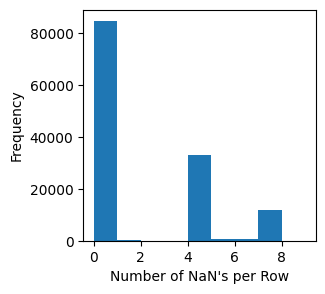

In [ ]:
# Find NaN's in df
df.isna().value_counts()
# Count NaN's per row
df['NaNs'] = df.isna().sum(axis=1)
# plot df['NaNs'] as histogram
plt.hist(df['NaNs'], bins=np.arange(start=0, stop=10, step=1), label="Number of NaN's per row")
# width narrower
plt.xlabel('Number of NaN\'s per Row')
plt.ylabel('Frequency')
# plot width 2inx2in
plt.gcf().set_size_inches(3, 3)

Interesting! There seems to be a pattern in the missing data

In [ ]:
# number of NaN's per column
df.isna().sum(axis=0)

age                         0
male                     1107
white                       0
black                       0
judge_name                  0
nyc                         0
release                     0
charge                      0
charge_severity             0
charge_weight             797
violent                     0
remand_requested        42162
ror_requested           42162
nmr_requested           42162
no_release_requested    42162
prior_vfo_cnt           20695
prior_nonvfo_cnt        20695
prior_misd_cnt          20695
pending_vfo             20695
pending_nonvfo          20695
pending_misd            20695
rearrest                16055
NaNs                        0
dtype: int64

In [ ]:
df[['remand_requested', 'ror_requested', 'nmr_requested', 'no_release_requested']].value_counts()

remand_requested  ror_requested  nmr_requested  no_release_requested
0.0               0.0            0.0            1.0                     47627
                  1.0            0.0            0.0                     21167
                  0.0            0.0            0.0                     15060
                                 1.0            0.0                     10751
1.0               0.0            0.0            0.0                      2820
                                                1.0                        12
0.0               1.0            0.0            1.0                         3
                  0.0            1.0            1.0                         2
1.0               0.0            1.0            0.0                         1
                  1.0            0.0            0.0                         1
Name: count, dtype: int64

In [ ]:
# remove if male = NaN
dfc = df[~df['rearrest'].isna()]
dfc = dfc[~dfc['male'].isna()]
dfc = dfc[~dfc['charge_weight'].isna()]
dfc['NaNs'] = dfc.isna().sum(axis=1)
# plot df['NaNs'] as histogram
plt.hist(dfc['NaNs'], bins=np.arange(start=0, stop=10, step=1), label="Number of NaN's per row")
plt.xlabel('Number of NaN\'s per Row')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

In [ ]:
dfc.isna().sum(axis=0)

age                         0
male                        0
white                       0
black                       0
judge_name                  0
nyc                         0
release                     0
charge                      0
charge_severity             0
charge_weight               0
violent                     0
remand_requested        36425
ror_requested           36425
nmr_requested           36425
no_release_requested    36425
prior_vfo_cnt            3912
prior_nonvfo_cnt         3912
prior_misd_cnt           3912
pending_vfo              3912
pending_nonvfo           3912
pending_misd             3912
rearrest                    0
NaNs                        0
dtype: int64

In [ ]:
dfc.drop('NaNs', axis=1)

# List the remaining variables with missing values
na_vars = ['remand_requested', 'ror_requested', 'nmr_requested', 'no_release_requested',
           'prior_vfo_cnt', 'prior_nonvfo_cnt', 'prior_misd_cnt',
           'pending_vfo', 'pending_nonvfo', 'pending_misd']

# Create missingness indicators and fill missing with a placeholder (e.g. -1)
for col in na_vars:
    dfc[f'{col}_missing'] = dfc[col].isna().astype(int)
    dfc[col] = dfc[col].fillna(-1)

dfc.head()

age  male  white  black            judge_name  nyc  release  \
0   21   1.0      1      0    Tatham, Beverly S.    1        0   
1   19   1.0      0      1  Tubridy, Jennifer A.    1        1   
3   23   1.0      0      0     Johnson, Nichelle    0        0   
4   40   1.0      1      0  Battisti, Anthony M.    1        1   
5   21   1.0      0      1   Garramone, Grant J.    0        0   

                 charge charge_severity charge_weight  ...  \
0     Criminal Contempt          Felony            EF  ...   
1     Criminal Contempt     Misdemeanor            AM  ...   
3  Unlicensed Operation     Misdemeanor            UM  ...   
4               Larceny     Misdemeanor            AM  ...   
5     Criminal Contempt          Felony            EF  ...   

   remand_requested_missing  ror_requested_missing  nmr_requested_missing  \
0                         1                      1                      1   
1                         0                      0                      0   
3                         1                      1                      1   
4                         1                      1                      1   
5                         0                      0                      0   

   no_release_requested_missing  prior_vfo_cnt_missing  \
0                             1                      0   
1                             0                      0   
3                             1                      1   
4                             1                      0   
5                             0                      0   

   prior_nonvfo_cnt_missing  prior_misd_cnt_missing  pending_vfo_missing  \
0                         0                       0                    0   
1                         0                       0                    0   
3                         1                       1                    1   
4                         0                       0                    0   
5                         0                       0                    0   

   pending_nonvfo_missing  pending_misd_missing  
0                       0                     0  
1                       0                     0  
3                       1                     1  
4                       0                     0  
5                       0                     0  

[5 rows x 33 columns]

In [ ]:
vars = dfc.columns.tolist()#.remove('judge_name').remove('NaNs')
vars.remove('judge_name')
vars.remove('NaNs')

In [ ]:
# remove empty charge_severity
dfc = dfc[dfc['charge_severity'] != ' ']

In [ ]:
# force release = 1
dfc = dfc[dfc['release'] == 1]

In [ ]:
dfc['charge'].unique()
dfc['charge_weight'].unique()
# dfc[['charge', 'charge_severity']].value_counts()#.unique()


array(['AM', 'UM', 'BF', 'DF', 'BM', 'EF', 'AF', 'CF'], dtype=object)

In [ ]:
# encode what we have
charge_weight_order = {
    'BM': 1,    # B Misdemeanor
    'UM': 2,    # Unclassified Misdemeanor
    'AM': 3,    # A Misdemeanor
    'EF': 4,    # E Felony
    'DF': 5,    # D Felony
    'CF': 6,    # C Felony
    'BF': 7,    # B Felony
    'AF': 8     # A Felony
}

# map it into dfc
dfc['charge_score'] = dfc['charge_weight'].map(charge_weight_order)

# remove charge_severity and charge_weight
dfc = dfc.drop(['charge_severity', 'charge_weight'], axis=1)

# rename no_release_requested_missing to requests_missing
dfc = dfc.rename(columns={'no_release_requested_missing': 'requests_missing'})
# drop 'remand_requested_missing', 'ror_requested_missing', 'nmr_requested_missing'
dfc = dfc.drop(['remand_requested_missing', 'ror_requested_missing', 'nmr_requested_missing'], axis=1)
# rename pending_nonvfo_missing to pend_priors_missings
dfc = dfc.rename(columns={'pending_nonvfo_missing': 'pend_priors_missing'})
# drop 'pending_vfo_missing', 'prior_misd_cnt_missing', 'prior_vfo_cnt_missing', 'prior_nonvfo_cnt_missing', 'pending_misd_missing'
dfc = dfc.drop(['pending_vfo_missing', 'prior_misd_cnt_missing', 'prior_vfo_cnt_missing', 'prior_nonvfo_cnt_missing', 'pending_misd_missing'], axis=1)

In [ ]:
dfc.columns

Index(['age', 'male', 'white', 'black', 'judge_name', 'nyc', 'release',
       'charge', 'violent', 'remand_requested', 'ror_requested',
       'nmr_requested', 'no_release_requested', 'prior_vfo_cnt',
       'prior_nonvfo_cnt', 'prior_misd_cnt', 'pending_vfo', 'pending_nonvfo',
       'pending_misd', 'rearrest', 'NaNs', 'requests_missing',
       'pend_priors_missing', 'charge_score'],
      dtype='object')

In [ ]:
# correlate charge_score with everything else
dfc[['age', 'male', 'white', 'black', 'nyc', 'release',
       'charge_score', 'violent', 'rearrest', 'NaNs', 'remand_requested', 'ror_requested',
       'nmr_requested', 'no_release_requested', 'prior_vfo_cnt',
       'prior_nonvfo_cnt', 'prior_misd_cnt', 'pending_vfo', 'pending_nonvfo',
       'pending_misd', 'requests_missing', 'pend_priors_missing'
       ]].corr()['charge_score'].sort_values(ascending=False)


charge_score            1.000000
violent                 0.515641
black                   0.057059
nmr_requested           0.037285
pending_nonvfo          0.035891
prior_nonvfo_cnt        0.035422
prior_vfo_cnt           0.028234
male                    0.025847
remand_requested        0.015167
pending_vfo             0.010024
prior_misd_cnt          0.005766
rearrest               -0.004455
NaNs                   -0.006635
requests_missing       -0.006635
white                  -0.023321
nyc                    -0.032744
no_release_requested   -0.033521
ror_requested          -0.037448
pending_misd           -0.040250
age                    -0.061076
release                      NaN
pend_priors_missing          NaN
Name: charge_score, dtype: float64

In [ ]:
# add interaction term: black * nyc
dfc['black_nyc'] = dfc['black'] * dfc['nyc']

In [ ]:
# @title removing judge, charge, and NaNs
# remove judge_name, charge, charge_severity, charge_weight
dfc = dfc.drop(['judge_name', 'charge', 'NaNs'], axis=1)

In [ ]:
# correlate charge_score with everything else
dfc[dfc['release'] == 1][list(dfc.columns)].corr()['rearrest'].sort_values(ascending=False)

rearrest                1.000000
pending_misd            0.197839
prior_misd_cnt          0.154723
pending_nonvfo          0.152289
prior_nonvfo_cnt        0.105136
pending_vfo             0.095910
prior_vfo_cnt           0.082413
male                    0.054841
black                   0.038735
nmr_requested           0.035910
black_nyc               0.028616
remand_requested        0.027382
no_release_requested    0.025293
ror_requested           0.010541
nyc                     0.008188
charge_score           -0.004455
white                  -0.014109
age                    -0.021483
requests_missing       -0.027237
violent                -0.031526
release                      NaN
pend_priors_missing          NaN
Name: rearrest, dtype: float64

In [ ]:
dfc
# 'judge_name', 'charge', 'charge_severity', 'charge_weight' --> has to be dummy encoded before classification

age  male  white  black  nyc  release  violent  remand_requested  \
1        19   1.0      0      1    1        1        0               0.0   
4        40   1.0      1      0    1        1        0              -1.0   
6        32   0.0      0      0    0        1        0               0.0   
19       43   1.0      1      0    0        1        0              -1.0   
24       37   1.0      0      1    1        1        0               0.0   
...     ...   ...    ...    ...  ...      ...      ...               ...   
174490   53   1.0      0      1    1        1        0               0.0   
174491   42   1.0      1      0    1        1        0               0.0   
174492   20   0.0      0      1    1        1        0               0.0   
174496   21   0.0      1      0    1        1        0               0.0   
174497   45   1.0      1      0    1        1        0               0.0   

        ror_requested  nmr_requested  ...  prior_nonvfo_cnt  prior_misd_cnt  \
1                 0.0            0.0  ...               0.0             0.0   
4                -1.0           -1.0  ...               0.0             0.0   
6                 0.0            0.0  ...               0.0             0.0   
19               -1.0           -1.0  ...               0.0             2.0   
24                1.0            0.0  ...               0.0             0.0   
...               ...            ...  ...               ...             ...   
174490            0.0            0.0  ...               0.0             8.0   
174491            1.0            0.0  ...               0.0             2.0   
174492            1.0            0.0  ...               0.0             0.0   
174496            1.0            0.0  ...               0.0             0.0   
174497            0.0            0.0  ...               1.0             7.0   

        pending_vfo  pending_nonvfo  pending_misd  rearrest  requests_missing  \
1               1.0             0.0           0.0       1.0                 0   
4               0.0             0.0           1.0       1.0                 1   
6               0.0             0.0           0.0       0.0                 0   
19              0.0             0.0           0.0       0.0                 1   
24              0.0             0.0           0.0       0.0                 0   
...             ...             ...           ...       ...               ...   
174490          0.0             0.0           0.0       0.0                 0   
174491          0.0             0.0           1.0       0.0                 0   
174492          0.0             0.0           0.0       0.0                 0   
174496          0.0             0.0           0.0       1.0                 0   
174497          0.0             0.0           0.0       0.0                 0   

        pend_priors_missing  charge_score  black_nyc  
1                         0             3          1  
4                         0             3          0  
6                         0             2          0  
19                        0             3          0  
24                        0             3          1  
...                     ...           ...        ...  
174490                    0             3          1  
174491                    0             3          0  
174492                    0             3          1  
174496                    0             3          0  
174497                    0             3          0  

[63739 rows x 22 columns]

In [ ]:
dfc.head()

age  male  white  black  nyc  release  violent  remand_requested  \
1    19   1.0      0      1    1        1        0               0.0   
4    40   1.0      1      0    1        1        0              -1.0   
6    32   0.0      0      0    0        1        0               0.0   
19   43   1.0      1      0    0        1        0              -1.0   
24   37   1.0      0      1    1        1        0               0.0   

    ror_requested  nmr_requested  ...  prior_nonvfo_cnt  prior_misd_cnt  \
1             0.0            0.0  ...               0.0             0.0   
4            -1.0           -1.0  ...               0.0             0.0   
6             0.0            0.0  ...               0.0             0.0   
19           -1.0           -1.0  ...               0.0             2.0   
24            1.0            0.0  ...               0.0             0.0   

    pending_vfo  pending_nonvfo  pending_misd  rearrest  requests_missing  \
1           1.0             0.0           0.0       1.0                 0   
4           0.0             0.0           1.0       1.0                 1   
6           0.0             0.0           0.0       0.0                 0   
19          0.0             0.0           0.0       0.0                 1   
24          0.0             0.0           0.0       0.0                 0   

    pend_priors_missing  charge_score  black_nyc  
1                     0             3          1  
4                     0             3          0  
6                     0             2          0  
19                    0             3          0  
24                    0             3          1  

[5 rows x 22 columns]

In [ ]:
# @title scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# only scale age and charge_score
dfc[['age', 'charge_score']] = scaler.fit_transform(dfc[['age', 'charge_score']])
dfc.head()

age  male  white  black  nyc  release  violent  remand_requested  \
1  -1.357186   1.0      0      1    1        1        0               0.0   
4   0.360336   1.0      1      0    1        1        0              -1.0   
6  -0.293958   0.0      0      0    0        1        0               0.0   
19  0.605696   1.0      1      0    0        1        0              -1.0   
24  0.114975   1.0      0      1    1        1        0               0.0   

    ror_requested  nmr_requested  ...  prior_nonvfo_cnt  prior_misd_cnt  \
1             0.0            0.0  ...               0.0             0.0   
4            -1.0           -1.0  ...               0.0             0.0   
6             0.0            0.0  ...               0.0             0.0   
19           -1.0           -1.0  ...               0.0             2.0   
24            1.0            0.0  ...               0.0             0.0   

    pending_vfo  pending_nonvfo  pending_misd  rearrest  requests_missing  \
1           1.0             0.0           0.0       1.0                 0   
4           0.0             0.0           1.0       1.0                 1   
6           0.0             0.0           0.0       0.0                 0   
19          0.0             0.0           0.0       0.0                 1   
24          0.0             0.0           0.0       0.0                 0   

    pend_priors_missing  charge_score  black_nyc  
1                     0     -0.309717          1  
4                     0     -0.309717          0  
6                     0     -1.143941          0  
19                    0     -0.309717          0  
24                    0     -0.309717          1  

[5 rows x 22 columns]

<Axes: >

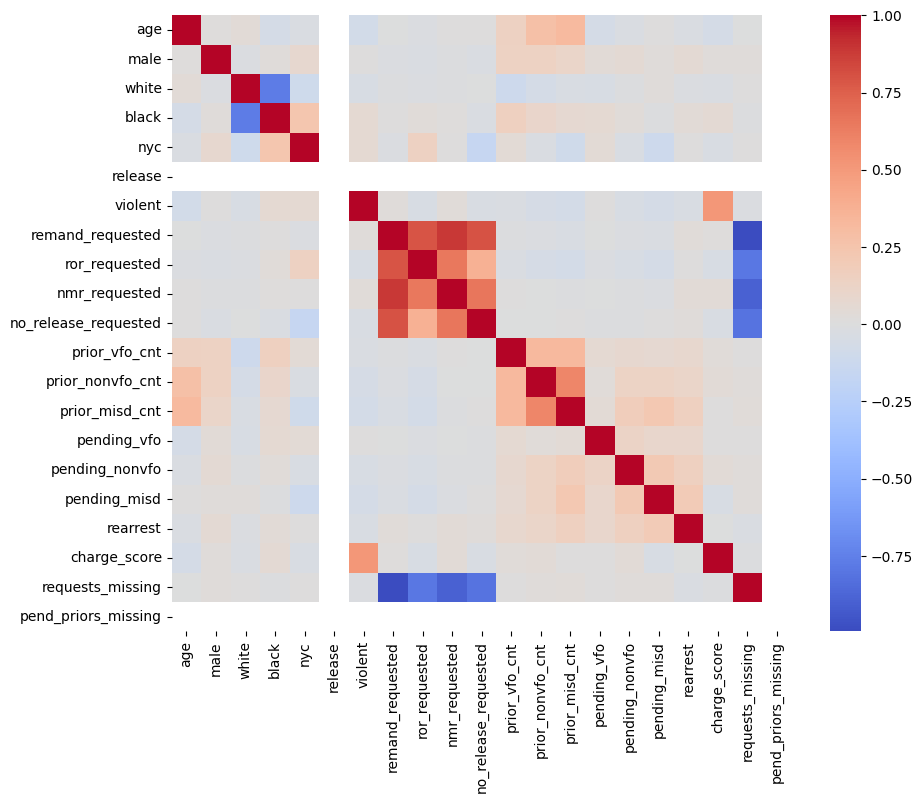

In [ ]:
import seaborn as sns
corr = dfc[['age', 'male', 'white', 'black', 'nyc', 'release', 'violent',
       'remand_requested', 'ror_requested', 'nmr_requested',
       'no_release_requested', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'pending_vfo', 'pending_nonvfo', 'pending_misd',
       'rearrest', 'charge_score', 'requests_missing', 'pend_priors_missing']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')

<Axes: >

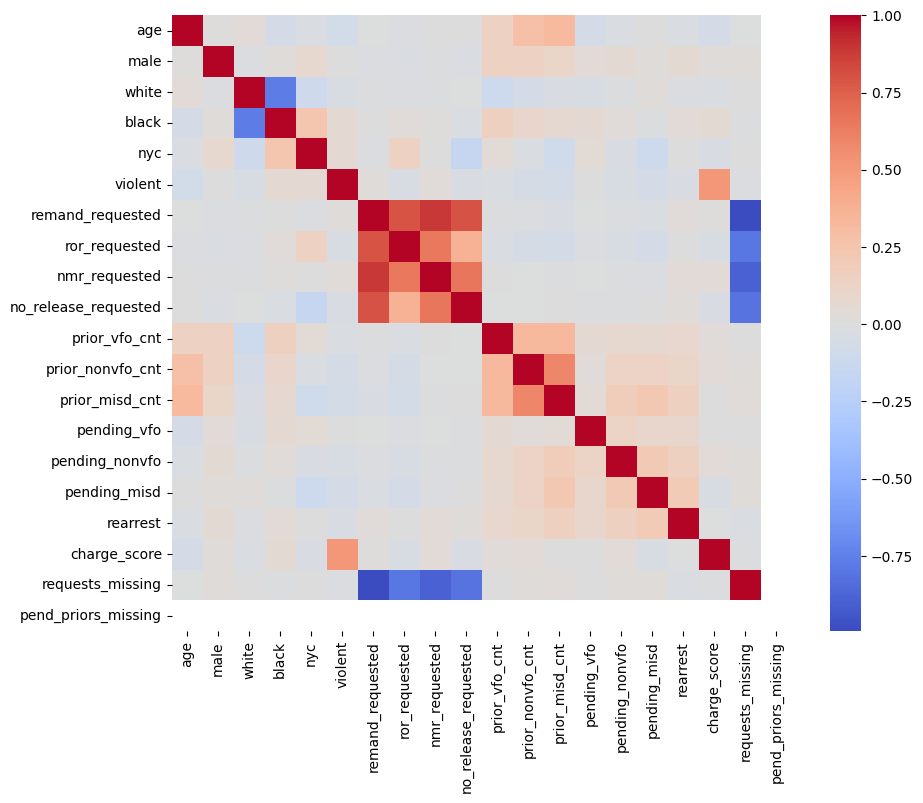

In [ ]:
# Create a correlation matrix heat map
import seaborn as sns
import matplotlib.pyplot as plt

grah = dfc[dfc['release'] == 1]
# Drop release
grah = grah.drop('release', axis=1)

corr = grah[['age', 'male', 'white', 'black', 'nyc', 'violent',
       'remand_requested', 'ror_requested', 'nmr_requested',
       'no_release_requested', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'pending_vfo', 'pending_nonvfo', 'pending_misd',
       'rearrest', 'charge_score', 'requests_missing', 'pend_priors_missing']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')

# Model with Demographics

## Logistic Regression

In [ ]:
# @title logistic regression with L1 penalty to predict rearrest
from sklearn.linear_model import LogisticRegression
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

X = dfc.drop('rearrest', axis=1)
y = dfc['rearrest']

In [ ]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
coeffsum = []
scoreslist = []
for alpha in alphas:
  lasso = LogisticRegression(penalty="l1", C= alpha, solver='saga')
  scores = cross_val_score(lasso, X, y, cv=5)
  coeffsum.append(lasso.fit(X, y).coef_.sum())
  print('alpha:', alpha)
  scoreslist.append(scores.mean())

alpha: 1e-05
alpha: 0.0001
alpha: 0.001
alpha: 0.01
alpha: 0.1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


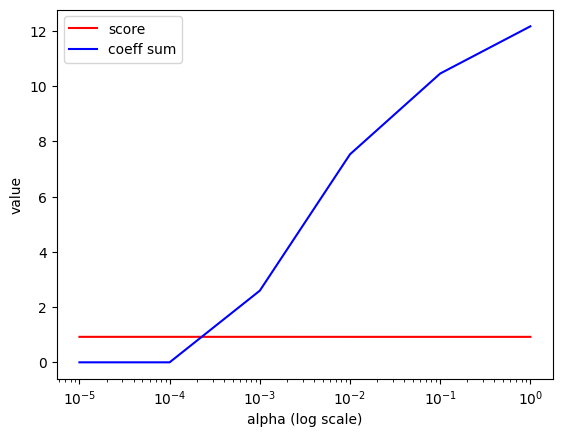

In [ ]:
fig, ax = plt.subplots()
pd.Series(scoreslist, index=alphas).plot(ax=ax, color='red', label='score')
pd.Series(coeffsum, index=alphas).plot(ax=ax, color='blue', label='coeff sum')

ax.set_xscale('log')
ax.set_xlabel('alpha (log scale)')
ax.set_ylabel('value')
ax.legend()
plt.show()

In [ ]:
lasso = LogisticRegression(penalty="l1", C= 1e-4, solver='saga')
scores = cross_val_score(lasso, X, y, cv=5)
print('alpha:', alpha)

alpha: 1


In [ ]:
model = LogisticRegression(penalty="l1", C=3, solver='saga')
model.fit(X, y)
# see regression table
print(model.coef_)

[[-0.19981404  0.22332575  0.12616636  0.20015044  0.17296183  9.4101103
  -0.26730502 -0.10149947  0.04288347  0.23862965  0.06488818  0.15335107
   0.05798468  0.10236259  0.60616894  0.63197145  0.95434435  0.01659652
  -0.06939635  0.01168944 -0.0240339 ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9222841735902729


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Build coefficient table
coef_table = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})

# Optional: add intercept
coef_table.loc[-1] = ['intercept', model.intercept_[0]]
coef_table.index = coef_table.index + 1
coef_table = coef_table.sort_index()

print(coef_table)

                 feature  coefficient
0              intercept   -12.078110
1                    age    -0.199814
2                   male     0.223326
3                  white     0.126166
4                  black     0.200150
5                    nyc     0.172962
6                release     9.410110
7                violent    -0.267305
8       remand_requested    -0.101499
9          ror_requested     0.042883
10         nmr_requested     0.238630
11  no_release_requested     0.064888
12         prior_vfo_cnt     0.153351
13      prior_nonvfo_cnt     0.057985
14        prior_misd_cnt     0.102363
15           pending_vfo     0.606169
16        pending_nonvfo     0.631971
17          pending_misd     0.954344
18      requests_missing     0.016597
19   pend_priors_missing    -0.069396
20          charge_score     0.011689
21             black_nyc    -0.024034


In [ ]:
dfc = dfc[dfc['release'] == 1].drop('release', axis=1)

In [ ]:
X = dfc.drop('rearrest', axis=1)
X['intercept'] = 1
y = dfc['rearrest']

In [ ]:
X.columns

Index(['age', 'male', 'white', 'black', 'nyc', 'violent', 'remand_requested',
       'ror_requested', 'nmr_requested', 'no_release_requested',
       'prior_vfo_cnt', 'prior_nonvfo_cnt', 'prior_misd_cnt', 'pending_vfo',
       'pending_nonvfo', 'pending_misd', 'requests_missing',
       'pend_priors_missing', 'charge_score', 'black_nyc', 'intercept'],
      dtype='object')

## Lasso Regression


Running Lasso regression with different λ values...
50

Lasso Regression Results:
λ = 0.0001: Features: 17/21, Test MSE: 0.118452
λ = 0.0043: Features: 10/21, Test MSE: 0.119539
λ = 0.1842: Features: 0/21, Test MSE: 0.127666
λ = 7.9060: Features: 0/21, Test MSE: 0.127666
λ = 339.3222: Features: 0/21, Test MSE: 0.127666


/tmp/ipython-input-1251279148.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(features))  # Use a colormap with enough distinct colors


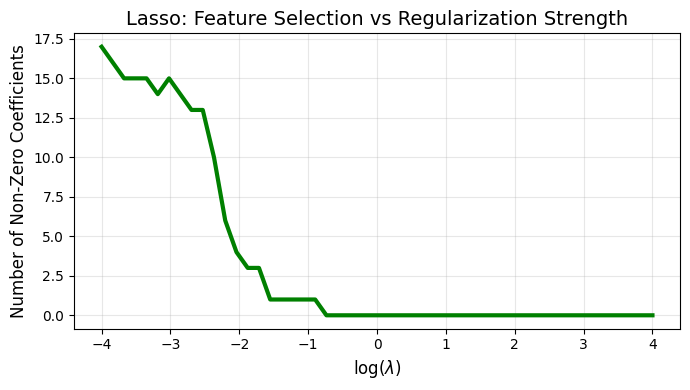


Best Lasso model (λ = 0.000100):
  Test MSE: 0.118452
  Features selected: 17 out of 21


In [ ]:
# @title Lasso Regression
import matplotlib as mpl
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.cm as cm

# add intercept column to X
X['intercept'] = 1

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of lambda values (log spaced)
lambdas = np.logspace(-4, 4, 50)  # More values for smoother curves

# Select key features to track (first 5 or fewer)
features = X.columns.tolist()
feature_cols = features

# Run Lasso for each lambda value
print("\nRunning Lasso regression with different λ values...")
lasso_results = []

for l in lambdas:
    # Fit model and get predictions
    lasso = Lasso(alpha=l, max_iter=10000, random_state=42)
    lasso.fit(X_train_scaled, y_train)

    # Calculate metrics
    train_preds = lasso.predict(X_train_scaled)
    test_preds = lasso.predict(X_test_scaled)
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    nonzero_coefs = sum(lasso.coef_ != 0)

    # Store all results
    lasso_results.append({
        'lambda': l,
        'coef': lasso.coef_,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'nonzero_coefs': nonzero_coefs
    })

# Extract data for easier plotting
lasso_coefs = [r['coef'] for r in lasso_results]
print(len(lasso_coefs))
lasso_train_mses = [r['train_mse'] for r in lasso_results]
lasso_test_mses = [r['test_mse'] for r in lasso_results]
lasso_nonzero_coefs = [r['nonzero_coefs'] for r in lasso_results]

# Print results for key lambda values
print("\nLasso Regression Results:")
for i in [0, 10, 20, 30, 40]:
    print(f"λ = {lambdas[i]:.4f}: Features: {lasso_nonzero_coefs[i]}/{len(feature_cols)}, "
          f"Test MSE: {lasso_test_mses[i]:.6f}")

# Create two plots for Lasso (coefficients and MSE)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Coefficient paths for key features
colors = cm.get_cmap('tab20', len(features))  # Use a colormap with enough distinct colors

for i, feature in enumerate(features):
    ax1.plot(np.log10(lambdas),
             [coef[i] for coef in lasso_coefs],
             label=feature,
             linewidth=2,
             color=colors(i))

ax1.axhline(y=0, color='k', linestyle='--', alpha=0.4)
ax1.set_xlabel(r'$\log(\lambda)$', fontsize=12)
ax1.set_ylabel('Standardized Coefficients', fontsize=12)
ax1.set_title('Lasso Coefficient Paths', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='right')

# 2. MSE vs lambda
ax2.plot(np.log10(lambdas), lasso_train_mses, 'b-', label='Training MSE', linewidth=2)
ax2.plot(np.log10(lambdas), lasso_test_mses, 'r-', label='Test MSE', linewidth=2)

# Mark best lambda
best_lasso_idx = np.argmin(lasso_test_mses)
ax2.plot(np.log10(lambdas[best_lasso_idx]), lasso_test_mses[best_lasso_idx],
         'ro', markersize=10, label=f'Best λ = {lambdas[best_lasso_idx]:.4f}')

ax2.set_xlabel(r'$\log(\lambda)$', fontsize=12)
ax2.set_ylabel('Mean Squared Error', fontsize=12)
ax2.set_title('Lasso: MSE vs Regularization', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='right')

plt.tight_layout()
plt.show()

# Feature selection plot
plt.figure(figsize=(7, 4))
plt.plot(np.log10(lambdas), lasso_nonzero_coefs, 'g-', linewidth=3)
plt.xlabel(r'$\log(\lambda)$', fontsize=12)
plt.ylabel('Number of Non-Zero Coefficients', fontsize=12)
plt.title('Lasso: Feature Selection vs Regularization Strength', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Results summary
print(f"\nBest Lasso model (λ = {lambdas[best_lasso_idx]:.6f}):")
print(f"  Test MSE: {lasso_test_mses[best_lasso_idx]:.6f}")
print(f"  Features selected: {lasso_nonzero_coefs[best_lasso_idx]} out of {len(feature_cols)}")

/tmp/ipython-input-2290323886.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(features))  # Use a colormap with enough distinct colors


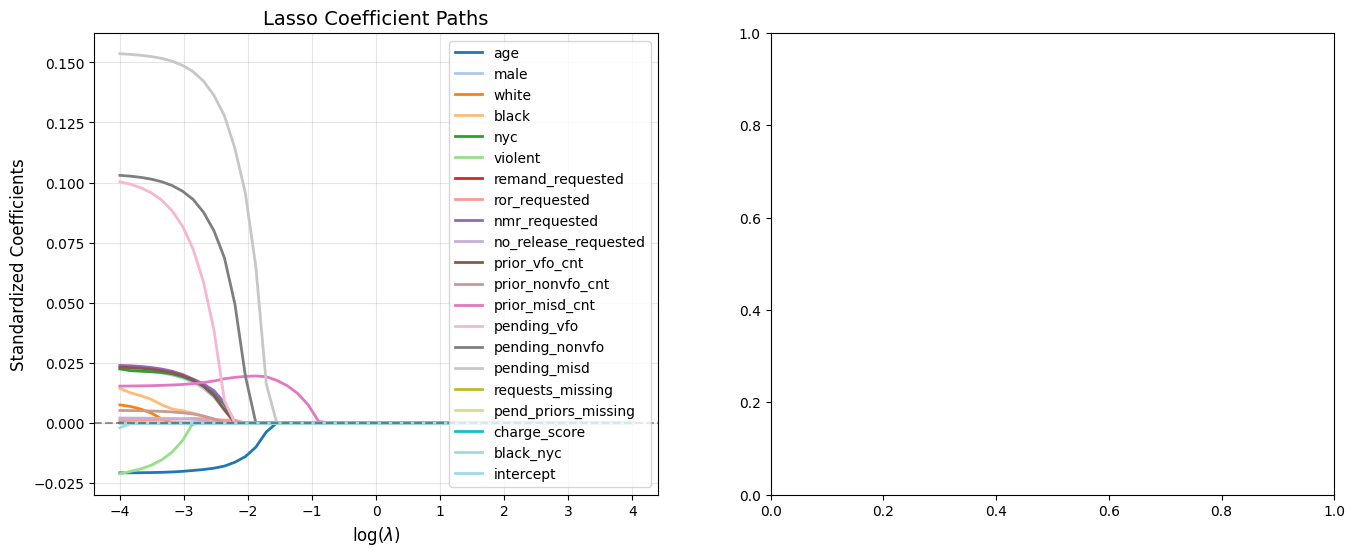

In [ ]:
# @title Create two plots for Lasso (coefficients and MSE)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Coefficient paths for key features
colors = cm.get_cmap('tab20', len(features))  # Use a colormap with enough distinct colors

for i, feature in enumerate(features):
    ax1.plot(np.log10(lambdas),
             [coef[i] for coef in lasso_coefs],
             label=feature,
             linewidth=2,
             color=colors(i))

ax1.axhline(y=0, color='k', linestyle='--', alpha=0.4)
ax1.set_xlabel(r'$\log(\lambda)$', fontsize=12)
ax1.set_ylabel('Standardized Coefficients', fontsize=12)
ax1.set_title('Lasso Coefficient Paths', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='right')

In [ ]:
# @title Accuracy
# what is the accuracy of this model?
lasso = LogisticRegression(penalty="l1", C=1e-4, solver='saga')
scores = cross_val_score(lasso, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.85260433 0.85260433 0.85260433 0.85260433 0.85267122]
0.8526177074241726


Text(0, 0.5, 'Count')

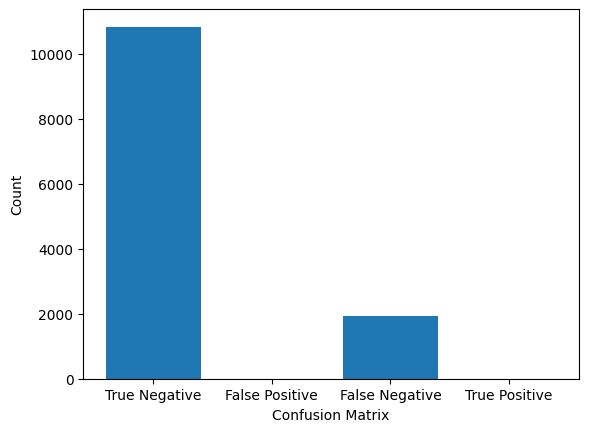

In [ ]:
# @title FNR FPR
# print the fpr and fnr of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = LogisticRegression(penalty="l1", C=1e-4, solver='saga')
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# visualize tn, fp, fn, tp
fig, ax = plt.subplots()
ax.bar(['True Negative', 'False Positive', 'False Negative', 'True Positive'], [tn, fp, fn, tp])
ax.set_xlabel('Confusion Matrix')
ax.set_ylabel('Count')

array([[0.38245425, 0.61754575],
       [0.32720988, 0.67279012],
       [0.54600631, 0.45399369],
       ...,
       [0.59538671, 0.40461329],
       [0.47130421, 0.52869579],
       [0.51978432, 0.48021568]])

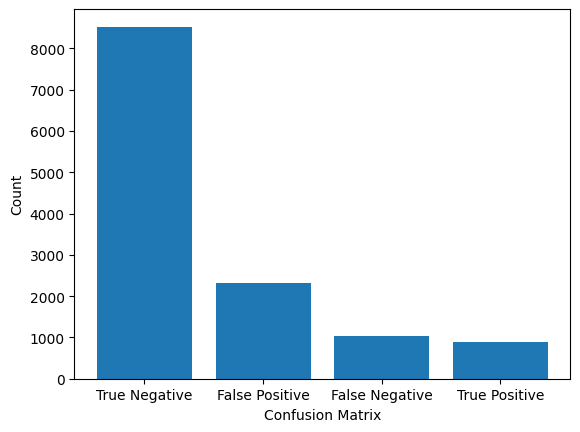

In [ ]:
# @title FNR and FPR graphs
# print the fpr and fnr of the model
# X_train, X_test, y_train, y_test = train_test_split(X[filter], y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty="l2", C=1e-4, solver='saga', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# visualize tn, fp, fn, tp
fig, ax = plt.subplots()
ax.bar(['True Negative', 'False Positive', 'False Negative', 'True Positive'], [tn, fp, fn, tp])
ax.set_xlabel('Confusion Matrix')
ax.set_ylabel('Count')

model.predict_proba(X_test)

In [ ]:
# @title Accuracy
# get model accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

# get confusion matrix
# X_train, X_test, y_train, y_test = train_test_split(X[filter], y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

[0.73901789 0.73839034 0.73431126 0.7394101  0.74660704]
0.7395473267499967
True Negative: 8524
False Positive: 2309
False Negative: 1030
True Positive: 885


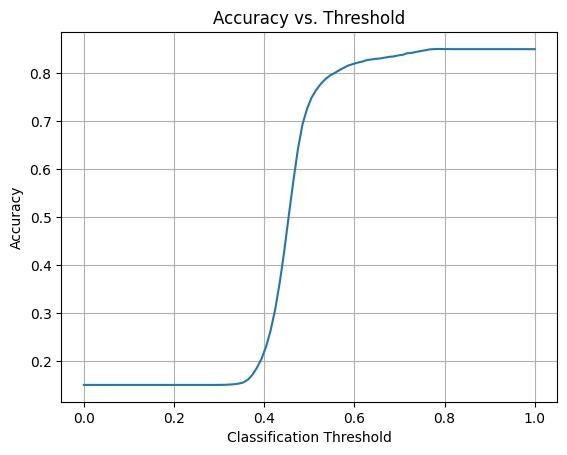

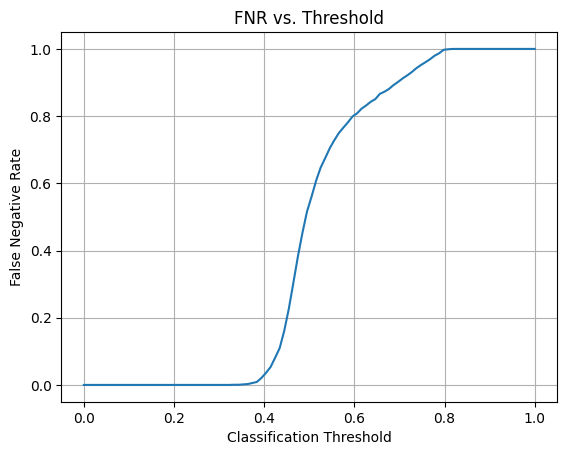

In [ ]:
# @title threshold analysis
# create ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob)
auc_score = auc(fpr, tpr)
auc_score
#visualize curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# visualize accuracy change as proba threshold for classification changes
# y-axis: accuracy (0 to 1)
# x-axis: classification threshold for predict_proba (0 to 1)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 100)
accuracies = []

for t in thresholds:
    preds = (prob >= t).astype(int)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

plt.plot(thresholds, accuracies)
plt.xlabel('Classification Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.show()

# FNR

from sklearn.metrics import confusion_matrix

fnr_list = []

for t in thresholds:
    preds = (prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    fnr_list.append(fnr)

plt.plot(thresholds, fnr_list)
plt.xlabel('Classification Threshold')
plt.ylabel('False Negative Rate')
plt.title('FNR vs. Threshold')
plt.grid(True)
plt.show()


In [ ]:
# @title Accuracy: F1 optimization
# caluclate the accuracy when f1 score is optimized for model
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for t in thresholds:
    preds = (prob[:, 1] >= t).astype(int)
    f1 = f1_score(y_test, preds)
    f1_scores.append(f1)

# Find the threshold that maximizes F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

# Calculate accuracy for the threshold
preds = (prob[:, 1] >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, preds)

print("Best Threshold:", best_threshold)
print("Accuracy:", accuracy)


Best Threshold: 0.48484848484848486
Accuracy: 0.6925007844367744


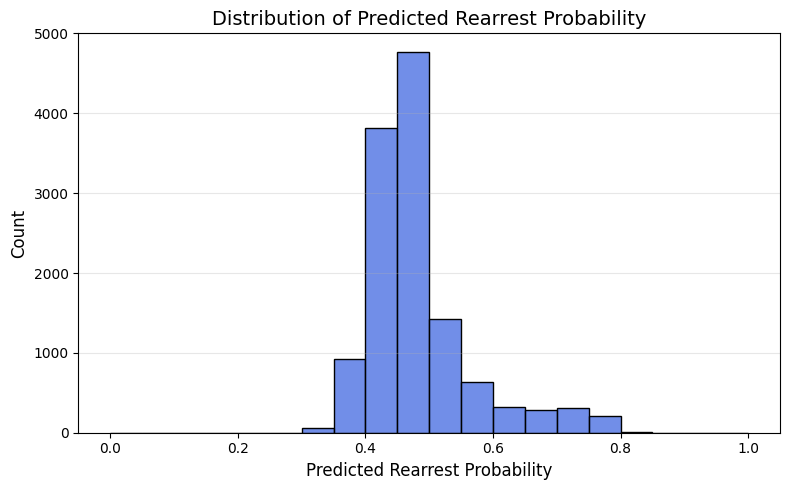

In [ ]:
# @title pred proba
# Get predicted probabilities
probs = pd.Series(model.predict_proba(X_test)[:, 1])

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(probs, bins=np.arange(0, 1.05, 0.05), kde=False, color='royalblue', edgecolor='black')

plt.xlabel('Predicted Rearrest Probability', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Predicted Rearrest Probability', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Neural Network Classification

### stuff

In [ ]:
# @title neural network
# Modular neural backbone + interchangeable heads with hyperparameter tuning
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.utils import check_array
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from typing import Optional, Callable, Dict, Any, List
import itertools
from copy import deepcopy

# ---------------------------
# Utilities to convert inputs
# ---------------------------
def to_torch(x):
    if isinstance(x, np.ndarray):
        return torch.from_numpy(x).float()
    else:
        return torch.from_numpy(x.values).float()

def ensure_numpy(x):
    if hasattr(x, "values"):
        return x.values
    return np.array(x)

# ---------------------------
# Backbone (feature extractor)
# ---------------------------
class MLPBackbone(nn.Module):
    def __init__(self, input_dim, hidden_dims=(128, 64), activation=nn.ReLU, dropout_rate=0.0):
        super().__init__()
        dims = [input_dim] + list(hidden_dims)
        layers = []
        for i in range(len(dims)-1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(activation())
            if dropout_rate > 0:
                layers.append(nn.Dropout(dropout_rate))
        self.feature_net = nn.Sequential(*layers)

    def forward(self, x):
        return self.feature_net(x)

# ---------------------------
# PyTorch head (trainable)
# ---------------------------
class TorchHead(nn.Module):
    def __init__(self, feature_dim, out_dim=1):
        super().__init__()
        self.lin = nn.Linear(feature_dim, out_dim)

    def forward(self, features):
        return self.lin(features).squeeze(-1)

# ---------------------------
# Full model wrapper (for convenience)
# ---------------------------
class ModularClassifier:
    def __init__(self,
                 backbone: nn.Module,
                 torch_head: Optional[nn.Module] = None,
                 device: Optional[str] = None):
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.backbone = backbone.to(self.device)
        self.torch_head = torch_head.to(self.device) if torch_head is not None else None
        self.sklearn_head = None

    def _make_dataloader(self, X, y, batch_size=64, shuffle=True):
        X_t = to_torch(ensure_numpy(X)).to(self.device)
        y_t = to_torch(ensure_numpy(y)).to(self.device).squeeze()
        return DataLoader(TensorDataset(X_t, y_t), batch_size=batch_size, shuffle=shuffle)

    def train_torch_head(self,
                         X_train, y_train,
                         X_val=None, y_val=None,
                         head: Optional[nn.Module] = None,
                         freeze_backbone: bool = False,
                         optimizer_cls=torch.optim.Adam,
                         lr=1e-3,
                         batch_size=64,
                         epochs=50,
                         loss_fn: Callable = nn.BCEWithLogitsLoss(),
                         l1_lambda: float = 0.0,
                         l2_lambda: float = 0.0,
                         early_stopping_patience: int = None,
                         verbose: bool = True):
        if head is not None:
            self.torch_head = head.to(self.device)
        assert self.torch_head is not None, "Provide a torch head (TorchHead) to train."

        for p in self.backbone.parameters():
            p.requires_grad = not freeze_backbone

        params = filter(lambda p: p.requires_grad, list(self.backbone.parameters()) + list(self.torch_head.parameters()))
        opt = optimizer_cls(params, lr=lr)

        train_loader = self._make_dataloader(X_train, y_train, batch_size=batch_size, shuffle=True)
        val_loader = None
        if X_val is not None and y_val is not None:
            val_loader = self._make_dataloader(X_val, y_val, batch_size=batch_size, shuffle=False)

        best_val = float('-inf')  # Start at -infinity for maximizing AUC
        patience_counter = 0
        best_state = None

        for epoch in range(1, epochs+1):
            self.backbone.train()
            self.torch_head.train()
            epoch_losses = []
            for xb, yb in train_loader:
                opt.zero_grad()
                feats = self.backbone(xb)
                preds = self.torch_head(feats)

                loss = loss_fn(preds, yb)

                if l1_lambda > 0:
                    l1_pen = 0.
                    for p in self.torch_head.parameters():
                        l1_pen = l1_pen + p.abs().sum()
                    loss = loss + l1_lambda * l1_pen

                if l2_lambda > 0:
                    l2_pen = 0.
                    for p in self.torch_head.parameters():
                        l2_pen = l2_pen + (p**2).sum()
                    loss = loss + l2_lambda * l2_pen

                loss.backward()
                opt.step()
                epoch_losses.append(loss.item())

            if val_loader is not None:
                self.backbone.eval()
                self.torch_head.eval()
                val_preds = []
                val_trues = []
                with torch.no_grad():
                    for xb, yb in val_loader:
                        feats = self.backbone(xb)
                        preds = self.torch_head(feats)
                        val_preds.append(preds.cpu().numpy())
                        val_trues.append(yb.cpu().numpy())
                val_preds = np.concatenate(val_preds)
                val_trues = np.concatenate(val_trues)

                # Calculate classification metrics
                val_preds_proba = 1 / (1 + np.exp(-val_preds))  # Apply sigmoid
                val_preds_class = (val_preds_proba >= 0.5).astype(int)
                val_acc = accuracy_score(val_trues, val_preds_class)
                val_auc = roc_auc_score(val_trues, val_preds_proba)

                if verbose and (epoch % max(1, epochs//10) == 0 or epoch==1 or epoch==epochs):
                    print(f"Epoch {epoch}/{epochs} - train_loss: {np.mean(epoch_losses):.6f} - val_acc: {val_acc:.6f} - val_auc: {val_auc:.6f}")

                # For classification, MAXIMIZE AUC
                if val_auc > best_val:
                    best_val = val_auc
                    patience_counter = 0
                    best_state = {
                        'backbone': deepcopy(self.backbone.state_dict()),
                        'head': deepcopy(self.torch_head.state_dict())
                    }
                else:
                    patience_counter += 1

                if early_stopping_patience and patience_counter >= early_stopping_patience:
                    if verbose:
                        print(f"Early stopping at epoch {epoch}")
                    break
            else:
                if verbose and (epoch % max(1, epochs//10) == 0 or epoch==1 or epoch==epochs):
                    print(f"Epoch {epoch}/{epochs} - train_loss: {np.mean(epoch_losses):.6f}")

        # Restore best model if early stopping was used
        if best_state is not None:
            self.backbone.load_state_dict(best_state['backbone'])
            self.torch_head.load_state_dict(best_state['head'])

        return self

    def train_sklearn_head(self, X_train, y_train, sklearn_model, freeze_backbone: bool = True, batch_size=512):
        self.backbone.eval()
        device_backup = self.device
        self.backbone.to("cpu")
        X_np = ensure_numpy(X_train)
        X_np = check_array(X_np)
        feats = []
        with torch.no_grad():
            for i in range(0, X_np.shape[0], batch_size):
                xb = torch.from_numpy(X_np[i:i+batch_size]).float()
                feats.append(self.backbone(xb).numpy())
        feats = np.vstack(feats)
        sklearn_model.fit(feats, ensure_numpy(y_train).ravel())
        self.sklearn_head = sklearn_model
        self.backbone.to(device_backup)
        return self

    def predict(self, X, return_proba=False):
        X_np = ensure_numpy(X)
        if self.sklearn_head is not None:
            self.backbone.eval()
            self.backbone.to("cpu")
            with torch.no_grad():
                feats = self.backbone(torch.from_numpy(X_np).float()).numpy()
            if return_proba:
                preds = self.sklearn_head.predict_proba(feats)[:, 1]
            else:
                preds = self.sklearn_head.predict(feats)
            self.backbone.to(self.device)
            return preds
        elif self.torch_head is not None:
            self.backbone.eval()
            self.torch_head.eval()
            with torch.no_grad():
                xt = to_torch(X_np).to(self.device)
                logits = self.torch_head(self.backbone(xt)).cpu().numpy()
                probs = 1 / (1 + np.exp(-logits))  # Sigmoid
            if return_proba:
                return probs
            else:
                return (probs >= 0.5).astype(int)
        else:
            raise RuntimeError("No head trained.")



In [ ]:
# ---------------------------
# @title Hyperparameter Tuning: Grid Search
# ---------------------------
class GridSearchCV:
    def __init__(self,
                 input_dim: int,
                 param_grid: Dict[str, List[Any]],
                 head_type: str = 'torch',
                 cv: int = 3,
                 device: Optional[str] = None,
                 verbose: bool = True):
        """
        Grid search for hyperparameter tuning.

        Args:
            input_dim: Input dimension for the model
            param_grid: Dictionary of parameters to search
            head_type: 'torch' or 'sklearn'
            cv: Number of cross-validation folds
            device: Device to use for training
            verbose: Print progress
        """
        self.input_dim = input_dim
        self.param_grid = param_grid
        self.head_type = head_type
        self.cv = cv
        self.device = device
        self.verbose = verbose
        self.best_params_ = None
        self.best_score_ = float('-inf')  # For maximizing AUC
        self.cv_results_ = []

    def fit(self, X, y):
        # Generate all combinations of parameters
        keys = list(self.param_grid.keys())
        values = list(self.param_grid.values())
        param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

        if self.verbose:
            print(f"Testing {len(param_combinations)} parameter combinations...")

        for i, params in enumerate(param_combinations):
            if self.verbose:
                print(f"\n[{i+1}/{len(param_combinations)}] Testing params: {params}")

            # Cross-validation
            kf = KFold(n_splits=self.cv, shuffle=True, random_state=42)
            fold_scores = []

            for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
                X_train = X[train_idx] if isinstance(X, np.ndarray) else X.iloc[train_idx]
                X_val = X[val_idx] if isinstance(X, np.ndarray) else X.iloc[val_idx]
                y_train = y[train_idx] if isinstance(y, np.ndarray) else y.iloc[train_idx]
                y_val = y[val_idx] if isinstance(y, np.ndarray) else y.iloc[val_idx]

                # Create model with current parameters
                backbone_params = {k: v for k, v in params.items() if k in ['hidden_dims', 'dropout_rate']}
                backbone = MLPBackbone(input_dim=self.input_dim, **backbone_params)

                model = ModularClassifier(backbone, device=self.device)

                if self.head_type == 'torch':
                    feature_dim = params['hidden_dims'][-1]
                    torch_head = TorchHead(feature_dim=feature_dim, out_dim=1)

                    train_params = {k: v for k, v in params.items()
                                  if k in ['lr', 'batch_size', 'epochs', 'l1_lambda', 'l2_lambda', 'early_stopping_patience']}

                    model.train_torch_head(
                        X_train=X_train, y_train=y_train,
                        X_val=X_val, y_val=y_val,
                        head=torch_head,
                        freeze_backbone=False,
                        verbose=False,
                        **train_params
                    )
                else:  # sklearn head
                    sklearn_model = params.get('sklearn_model')
                    model.train_sklearn_head(X_train, y_train, sklearn_model=sklearn_model)

                # Evaluate using AUC
                preds_proba = model.predict(X_val, return_proba=True)
                auc = roc_auc_score(ensure_numpy(y_val).ravel(), preds_proba)
                fold_scores.append(auc)

            avg_score = np.mean(fold_scores)
            std_score = np.std(fold_scores)

            self.cv_results_.append({
                'params': params,
                'mean_score': avg_score,
                'std_score': std_score,
                'fold_scores': fold_scores
            })

            if self.verbose:
                print(f"  Mean CV AUC: {avg_score:.6f} (+/- {std_score:.6f})")

            # Maximize AUC score
            if avg_score > self.best_score_:
                self.best_score_ = avg_score
                self.best_params_ = params

        if self.verbose:
            print(f"\n{'='*60}")
            print(f"Best parameters: {self.best_params_}")
            print(f"Best CV AUC: {self.best_score_:.6f}")
            print(f"{'='*60}")

        return self

In [ ]:


# ---------------------------
# @title Hyperparameter Tuning: Optuna (Bayesian Optimization)
# ---------------------------
try:
    import optuna
    OPTUNA_AVAILABLE = True
except ImportError:
    OPTUNA_AVAILABLE = False

class OptunaSearchCV:
    def __init__(self,
                 input_dim: int,
                 param_space: Dict[str, Any],
                 head_type: str = 'torch',
                 n_trials: int = 50,
                 cv: int = 3,
                 device: Optional[str] = None,
                 verbose: bool = True):
        """
        Bayesian optimization using Optuna.

        Args:
            input_dim: Input dimension for the model
            param_space: Dictionary defining parameter search space
            head_type: 'torch' or 'sklearn'
            n_trials: Number of optimization trials
            cv: Number of cross-validation folds
            device: Device to use for training
            verbose: Print progress
        """
        if not OPTUNA_AVAILABLE:
            raise ImportError("Optuna is not installed. Install it with: pip install optuna")

        self.input_dim = input_dim
        self.param_space = param_space
        self.head_type = head_type
        self.n_trials = n_trials
        self.cv = cv
        self.device = device
        self.verbose = verbose
        self.best_params_ = None
        self.best_score_ = float('-inf')
        self.study = None

    def _objective(self, trial, X, y):
        # Sample parameters from the search space
        params = {}
        for key, config in self.param_space.items():
            if config['type'] == 'categorical':
                params[key] = trial.suggest_categorical(key, config['choices'])
            elif config['type'] == 'int':
                params[key] = trial.suggest_int(key, config['low'], config['high'], log=config.get('log', False))
            elif config['type'] == 'float':
                params[key] = trial.suggest_float(key, config['low'], config['high'], log=config.get('log', False))

        # Cross-validation
        kf = KFold(n_splits=self.cv, shuffle=True, random_state=42)
        fold_scores = []

        for train_idx, val_idx in kf.split(X):
            X_train = X[train_idx] if isinstance(X, np.ndarray) else X.iloc[train_idx]
            X_val = X[val_idx] if isinstance(X, np.ndarray) else X.iloc[val_idx]
            y_train = y[train_idx] if isinstance(y, np.ndarray) else y.iloc[train_idx]
            y_val = y[val_idx] if isinstance(y, np.ndarray) else y.iloc[val_idx]

            # Create model
            backbone_params = {k: v for k, v in params.items() if k in ['hidden_dims', 'dropout_rate']}
            backbone = MLPBackbone(input_dim=self.input_dim, **backbone_params)
            model = ModularClassifier(backbone, device=self.device)

            if self.head_type == 'torch':
                feature_dim = params['hidden_dims'][-1]
                torch_head = TorchHead(feature_dim=feature_dim, out_dim=1)

                train_params = {k: v for k, v in params.items()
                              if k in ['lr', 'batch_size', 'epochs', 'l1_lambda', 'l2_lambda', 'early_stopping_patience']}

                model.train_torch_head(
                    X_train=X_train, y_train=y_train,
                    X_val=X_val, y_val=y_val,
                    head=torch_head,
                    freeze_backbone=False,
                    verbose=False,
                    **train_params
                )
            else:
                sklearn_model = params.get('sklearn_model')
                model.train_sklearn_head(X_train, y_train, sklearn_model=sklearn_model)

            preds_proba = model.predict(X_val, return_proba=True)
            auc = roc_auc_score(ensure_numpy(y_val).ravel(), preds_proba)
            fold_scores.append(auc)

        return np.mean(fold_scores)

    def fit(self, X, y):
        if self.verbose:
            optuna.logging.set_verbosity(optuna.logging.INFO)
        else:
            optuna.logging.set_verbosity(optuna.logging.WARNING)

        self.study = optuna.create_study(direction='maximize')  # Maximize AUC
        self.study.optimize(lambda trial: self._objective(trial, X, y), n_trials=self.n_trials)

        self.best_params_ = self.study.best_params
        self.best_score_ = self.study.best_value

        if self.verbose:
            print(f"\n{'='*60}")
            print(f"Best parameters: {self.best_params_}")
            print(f"Best CV AUC: {self.best_score_:.6f}")
            print(f"{'='*60}")

        return self

In [ ]:


# ---------------------------
# @title Example usage
# ---------------------------
if __name__ == "__main__":
    import random
    from sklearn.model_selection import train_test_split

    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Separate features and target
    X = dfc.drop('rearrest', axis=1)
    y = dfc['rearrest']
    n_features = X.shape[1]

    # Split data (80/20 train/test split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print("=" * 60)
    print("DATA INFORMATION")
    print("=" * 60)
    print(f"Training samples: {len(X_train)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Number of features: {n_features}")
    print(f"\nClass distribution in training set:")
    print(y_train.value_counts(normalize=True))
    print(f"\nClass distribution in test set:")
    print(y_test.value_counts(normalize=True))

    print("\n" + "=" * 60)
    print("GRID SEARCH EXAMPLE")
    print("=" * 60)

    # Define parameter grid for grid search
    param_grid = {
        'hidden_dims': [(64, 32), (128, 64), (256, 128)],
        'dropout_rate': [0.0, 0.1, 0.2],
        'lr': [1e-3, 1e-4],
        'batch_size': [64, 128],
        'epochs': [30],
        'l1_lambda': [0.0, 1e-4],
        'l2_lambda': [0.0, 1e-4],
        'early_stopping_patience': [10]
    }

    grid_search = GridSearchCV(
        input_dim=n_features,
        param_grid=param_grid,
        head_type='torch',
        cv=3,
        verbose=True
    )

    grid_search.fit(X_train, y_train)

    # Train final model with best parameters
    best_params = grid_search.best_params_
    backbone = MLPBackbone(
        input_dim=n_features,
        hidden_dims=best_params['hidden_dims'],
        dropout_rate=best_params['dropout_rate']
    )
    final_model = ModularClassifier(backbone)

    feature_dim = best_params['hidden_dims'][-1]
    torch_head = TorchHead(feature_dim=feature_dim, out_dim=1)

    final_model.train_torch_head(
        X_train=X_train, y_train=y_train,
        X_val=X_test, y_val=y_test,
        head=torch_head,
        freeze_backbone=False,
        lr=best_params['lr'],
        batch_size=best_params['batch_size'],
        epochs=best_params['epochs'],
        l1_lambda=best_params['l1_lambda'],
        l2_lambda=best_params['l2_lambda'],
        early_stopping_patience=best_params['early_stopping_patience'],
        verbose=True
    )

    # Evaluate final model
    preds_class = final_model.predict(X_test)
    preds_proba = final_model.predict(X_test, return_proba=True)

    print(f"\n{'='*60}")
    print("FINAL MODEL PERFORMANCE")
    print(f"{'='*60}")
    print(f"Test Accuracy: {accuracy_score(y_test, preds_class):.6f}")
    print(f"Test AUC: {roc_auc_score(y_test, preds_proba):.6f}")
    print(f"Test F1: {f1_score(y_test, preds_class):.6f}")

    # Optuna example (if available)
    if OPTUNA_AVAILABLE:
        print("\n" + "=" * 60)
        print("OPTUNA SEARCH EXAMPLE")
        print("=" * 60)

        param_space = {
            'hidden_dims': {
                'type': 'categorical',
                'choices': [(64, 32), (128, 64), (256, 128), (128, 64, 32)]
            },
            'dropout_rate': {'type': 'float', 'low': 0.0, 'high': 0.3},
            'lr': {'type': 'float', 'low': 1e-5, 'high': 1e-2, 'log': True},
            'batch_size': {'type': 'categorical', 'choices': [32, 64, 128, 256]},
            'epochs': {'type': 'int', 'low': 20, 'high': 50},
            'l1_lambda': {'type': 'float', 'low': 1e-6, 'high': 1e-3, 'log': True},
            'l2_lambda': {'type': 'float', 'low': 1e-6, 'high': 1e-3, 'log': True},
            'early_stopping_patience': {'type': 'int', 'low': 5, 'high': 15}
        }

        optuna_search = OptunaSearchCV(
            input_dim=n_features,
            param_space=param_space,
            head_type='torch',
            n_trials=20,
            cv=3,
            verbose=True
        )

        optuna_search.fit(X_train, y_train)

DATA INFORMATION
Training samples: 50991
Test samples: 12748
Number of features: 21

Class distribution in training set:
rearrest
0.0    0.852621
1.0    0.147379
Name: proportion, dtype: float64

Class distribution in test set:
rearrest
0.0    0.852604
1.0    0.147396
Name: proportion, dtype: float64

GRID SEARCH EXAMPLE
Testing 144 parameter combinations...

[1/144] Testing params: {'hidden_dims': (64, 32), 'dropout_rate': 0.0, 'lr': 0.001, 'batch_size': 64, 'epochs': 30, 'l1_lambda': 0.0, 'l2_lambda': 0.0, 'early_stopping_patience': 10}
  Mean CV AUC: 0.706667 (+/- 0.002484)

[2/144] Testing params: {'hidden_dims': (64, 32), 'dropout_rate': 0.0, 'lr': 0.001, 'batch_size': 64, 'epochs': 30, 'l1_lambda': 0.0, 'l2_lambda': 0.0001, 'early_stopping_patience': 10}
  Mean CV AUC: 0.706909 (+/- 0.002017)

[3/144] Testing params: {'hidden_dims': (64, 32), 'dropout_rate': 0.0, 'lr': 0.001, 'batch_size': 64, 'epochs': 30, 'l1_lambda': 0.0001, 'l2_lambda': 0.0, 'early_stopping_patience': 10}
  M

In [ ]:
# @title save the best model and fit it to X and pred y
save_dir = file_path[:-1]
os.makedirs(save_dir, exist_ok=True)

# Save the final model
model_path = os.path.join(save_dir, 'best_model.pth')

# Save both backbone and head state dicts along with hyperparameters
'''save_dict = {
    'backbone_state_dict': final_model.backbone.state_dict(),
    'torch_head_state_dict': final_model.torch_head.state_dict(),
    'best_params': best_params,
    'input_dim': n_features,
    'test_accuracy': accuracy_score(y_test, preds_class),
    'test_auc': roc_auc_score(y_test, preds_proba),
    'test_f1': f1_score(y_test, preds_class)
}'''

save_dict = {
    'backbone_state_dict': final_model.backbone.state_dict(),
    'torch_head_state_dict': final_model.torch_head.state_dict(),
    'best_params': {
        'hidden_dims': (128, 64),
        'dropout_rate': 0.2,
        'lr': 0.001,
        'batch_size': 64,
        'epochs': 30,
        'l1_lambda': 0.0001,
        'l2_lambda': 0.0,
        'early_stopping_patience': 10
    },
    'input_dim': n_features,
    'test_accuracy': accuracy_score(y_test, preds_class),
    'test_auc': roc_auc_score(y_test, preds_proba),
    'test_f1': f1_score(y_test, preds_class)
}

torch.save(save_dict, model_path)
print(f"✓ Model saved successfully to: {model_path}")
print(f"\nSaved components:")
print(f"  - Backbone state dict")
print(f"  - Torch head state dict")
print(f"  - Best hyperparameters: {best_params}")
print(f"  - Test metrics (Acc: {save_dict['test_accuracy']:.4f}, AUC: {save_dict['test_auc']:.4f}, F1: {save_dict['test_f1']:.4f})")

# Optional: Also save grid search results
results_path = os.path.join(save_dir, 'grid_search_results.pth')
torch.save({
    'cv_results': grid_search.cv_results_,
    'best_score': grid_search.best_score_,
    'best_params': grid_search.best_params_
}, results_path)
print(f"\n✓ Grid search results saved to: {results_path}")

# If you ran Optuna search, save those results too
if OPTUNA_AVAILABLE and 'optuna_search' in locals():
    optuna_path = os.path.join(save_dir, 'optuna_search_results.pth')
    torch.save({
        'best_params': optuna_search.best_params_,
        'best_score': optuna_search.best_score_,
        'study': optuna_search.study
    }, optuna_path)
    print(f"✓ Optuna search results saved to: {optuna_path}")

In [ ]:
# @title load model
# To load the model later
checkpoint = torch.load('/content/drive/MyDrive/models/best_model.pth')

# Recreate the model architecture
backbone = MLPBackbone(
    input_dim=checkpoint['input_dim'],
    hidden_dims=checkpoint['best_params']['hidden_dims'],
    dropout_rate=checkpoint['best_params']['dropout_rate']
)
torch_head = TorchHead(
    feature_dim=checkpoint['best_params']['hidden_dims'][-1],
    out_dim=1
)

# Load the trained weights
backbone.load_state_dict(checkpoint['backbone_state_dict'])
torch_head.load_state_dict(checkpoint['torch_head_state_dict'])

# Create the model
loaded_model = ModularClassifier(backbone, torch_head)

In [ ]:
# @title neural network (fixed hyperparameters)
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.metrics import log_loss

# ---------------------------
# Utilities
# ---------------------------
def to_torch(x):
    if isinstance(x, np.ndarray):
        return torch.from_numpy(x).float()
    else:
        return torch.from_numpy(x.values).float()

def ensure_numpy(x):
    if hasattr(x, "values"):
        return x.values
    return np.array(x)

# ---------------------------
# Backbone (feature extractor)
# ---------------------------
class MLPBackbone(nn.Module):
    def __init__(self, input_dim, hidden_dims=(128, 64), activation=nn.ReLU, dropout_rate=0.0):
        super().__init__()
        dims = [input_dim] + list(hidden_dims)
        layers = []
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i + 1]))
            layers.append(activation())
            if dropout_rate > 0:
                layers.append(nn.Dropout(dropout_rate))
        self.feature_net = nn.Sequential(*layers)

    def forward(self, x):
        return self.feature_net(x)

# ---------------------------
# Torch head (classification)
# ---------------------------
class TorchHead(nn.Module):
    def __init__(self, feature_dim, out_dim=1):
        super().__init__()
        self.lin = nn.Linear(feature_dim, out_dim)

    def forward(self, features):
        return self.lin(features).squeeze(-1)

# ---------------------------
# Modular classifier
# ---------------------------
class ModularClassifier:
    def __init__(self, backbone, torch_head, device=None):
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.backbone = backbone.to(self.device)
        self.torch_head = torch_head.to(self.device)

    def _make_dataloader(self, X, y, batch_size=64, shuffle=True):
        X_t = to_torch(ensure_numpy(X)).to(self.device)
        y_t = to_torch(ensure_numpy(y)).to(self.device).squeeze()
        return DataLoader(TensorDataset(X_t, y_t), batch_size=batch_size, shuffle=shuffle)

    def train(self, X_train, y_train, X_val, y_val,
              lr=1e-3, batch_size=64, epochs=30,
              l1_lambda=1e-4, l2_lambda=0.0, early_stopping_patience=10):

        opt = torch.optim.Adam(
            list(self.backbone.parameters()) + list(self.torch_head.parameters()),
            lr=lr
        )
        loss_fn = nn.BCEWithLogitsLoss()
        train_loader = self._make_dataloader(X_train, y_train, batch_size=batch_size, shuffle=True)
        val_loader = self._make_dataloader(X_val, y_val, batch_size=batch_size, shuffle=False)

        best_val_loss = np.inf
        patience_counter = 0
        best_state = None

        for epoch in range(1, epochs + 1):
            self.backbone.train()
            self.torch_head.train()
            train_losses = []
            for xb, yb in train_loader:
                opt.zero_grad()
                feats = self.backbone(xb)
                preds = self.torch_head(feats)
                loss = loss_fn(preds, yb)

                if l1_lambda > 0:
                    l1_pen = sum(p.abs().sum() for p in self.torch_head.parameters())
                    loss = loss + l1_lambda * l1_pen
                if l2_lambda > 0:
                    l2_pen = sum((p ** 2).sum() for p in self.torch_head.parameters())
                    loss = loss + l2_lambda * l2_pen

                loss.backward()
                opt.step()
                train_losses.append(loss.item())

            # Validation
            self.backbone.eval()
            self.torch_head.eval()
            val_preds, val_trues = [], []
            with torch.no_grad():
                for xb, yb in val_loader:
                    feats = self.backbone(xb)
                    preds = self.torch_head(feats)
                    val_preds.append(preds.cpu().numpy())
                    val_trues.append(yb.cpu().numpy())
            val_preds = np.concatenate(val_preds)
            val_trues = np.concatenate(val_trues)

            val_probs = 1 / (1 + np.exp(-val_preds))
            val_logloss = log_loss(val_trues, val_probs)

            print(f"Epoch {epoch}/{epochs} | Train Loss: {np.mean(train_losses):.4f} | Val LogLoss: {val_logloss:.4f}")

            # Early stopping — MINIMIZE log loss
            if val_logloss < best_val_loss:  # rename variable below for clarity
                best_val_loss = val_logloss
                best_state = {
                    "backbone": deepcopy(self.backbone.state_dict()),
                    "head": deepcopy(self.torch_head.state_dict())
                }
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping at epoch {epoch}")
                    break


        if best_state is not None:
            self.backbone.load_state_dict(best_state["backbone"])
            self.torch_head.load_state_dict(best_state["head"])

    def predict(self, X, return_proba=False):
        self.backbone.eval()
        self.torch_head.eval()
        with torch.no_grad():
            xt = to_torch(ensure_numpy(X)).to(self.device)
            logits = self.torch_head(self.backbone(xt)).cpu().numpy()
            probs = 1 / (1 + np.exp(-logits))
        if return_proba:
            return probs
        return (probs >= 0.5).astype(int)


# ---------------------------
# Run example
# ---------------------------
if __name__ == "__main__":
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)

    # assume dfc exists
    X = dfc.drop('rearrest', axis=1)
    y = dfc['rearrest']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("=" * 60)
    print("DATA INFO")
    print(f"Train: {len(X_train)}, Test: {len(X_test)}, Features: {X.shape[1]}")
    print(y_train.value_counts(normalize=True))

    params = {
        'hidden_dims': (128, 64),
        'dropout_rate': 0.2,
        'lr': 0.001,
        'batch_size': 64,
        'epochs': 30,
        'l1_lambda': 0.0001,
        'l2_lambda': 0.0,
        'early_stopping_patience': 10
    }

    backbone = MLPBackbone(input_dim=X.shape[1],
                           hidden_dims=params['hidden_dims'],
                           dropout_rate=params['dropout_rate'])
    head = TorchHead(feature_dim=params['hidden_dims'][-1])

    model = ModularClassifier(backbone, head)
    model.train(
        X_train, y_train, X_test, y_test,
        lr=params['lr'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        l1_lambda=params['l1_lambda'],
        l2_lambda=params['l2_lambda'],
        early_stopping_patience=params['early_stopping_patience']
    )

    from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, log_loss

    # Get model predictions (assuming logits)
    preds_logits = model.predict(X_test)
    preds_proba = 1 / (1 + np.exp(-preds_logits))
    preds_class = (preds_proba >= 0.5).astype(int)

    print("\nFINAL PERFORMANCE")
    print(f"Log Loss: {log_loss(y_test, preds_proba):.4f}")  # <-- key metric for consistency
    print(f"AUC: {roc_auc_score(y_test, preds_proba):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, preds_class):.4f}")
    print(f"F1: {f1_score(y_test, preds_class):.4f}")


DATA INFO
Train: 50991, Test: 12748, Features: 21
rearrest
0.0    0.852621
1.0    0.147379
Name: proportion, dtype: float64
Epoch 1/30 | Train Loss: 0.3963 | Val LogLoss: 0.3874
Epoch 2/30 | Train Loss: 0.3867 | Val LogLoss: 0.3856
Epoch 3/30 | Train Loss: 0.3855 | Val LogLoss: 0.3857
Epoch 4/30 | Train Loss: 0.3845 | Val LogLoss: 0.3846
Epoch 5/30 | Train Loss: 0.3839 | Val LogLoss: 0.3847
Epoch 6/30 | Train Loss: 0.3836 | Val LogLoss: 0.3861
Epoch 7/30 | Train Loss: 0.3829 | Val LogLoss: 0.3862
Epoch 8/30 | Train Loss: 0.3826 | Val LogLoss: 0.3857
Epoch 9/30 | Train Loss: 0.3823 | Val LogLoss: 0.3857
Epoch 10/30 | Train Loss: 0.3815 | Val LogLoss: 0.3863
Epoch 11/30 | Train Loss: 0.3822 | Val LogLoss: 0.3854
Epoch 12/30 | Train Loss: 0.3812 | Val LogLoss: 0.3845
Epoch 13/30 | Train Loss: 0.3808 | Val LogLoss: 0.3853
Epoch 14/30 | Train Loss: 0.3807 | Val LogLoss: 0.3859
Epoch 15/30 | Train Loss: 0.3806 | Val LogLoss: 0.3847
Epoch 16/30 | Train Loss: 0.3801 | Val LogLoss: 0.3845
Epoch

In [ ]:
preds_logits = model.predict(X_train)
preds_proba = 1 / (1 + np.exp(-preds_logits))
preds_class = (preds_proba >= 0.5).astype(int)
print(f"Log Loss: {log_loss(y_train, preds_proba):.4f}")  # <-- key metric for consistency

Log Loss: 0.6932


In [ ]:
dfc.columns

Index(['age', 'male', 'white', 'black', 'nyc', 'release', 'violent',
       'remand_requested', 'ror_requested', 'nmr_requested',
       'no_release_requested', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'pending_vfo', 'pending_nonvfo', 'pending_misd',
       'rearrest', 'requests_missing', 'pend_priors_missing', 'charge_score',
       'black_nyc'],
      dtype='object')

In [ ]:
# @title load model, girliepop crashed
import torch
# === Reconstruct and train the best neural network ===
device = "cuda" if torch.cuda.is_available() else "cpu"

# train test split
import sklearn.model_selection as model_selection

y = dfc['rearrest']
# drop rearrest
X = dfc.drop('rearrest', axis=1)
n_features = X.shape[1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

save_dict = {
    'backbone_state_dict': None,
    'torch_head_state_dict': None,
    'best_params': {
        'hidden_dims': (128, 64),
        'dropout_rate': 0.2,
        'lr': 0.001,
        'batch_size': 64,
        'epochs': 30,
        'l1_lambda': 0.0001,
        'l2_lambda': 0.0,
        'early_stopping_patience': 10
    },
    'input_dim': n_features,
    'test_accuracy': accuracy_score(y_test, preds_class),
    'test_auc': roc_auc_score(y_test, preds_proba),
    'test_f1': f1_score(y_test, preds_class)
}

best_params = save_dict["best_params"]
input_dim = save_dict["input_dim"]

# 1. Recreate model architecture
backbone = MLPBackbone(
    input_dim=input_dim,
    hidden_dims=best_params["hidden_dims"],
    dropout_rate=best_params["dropout_rate"]
)
torch_head = TorchHead(feature_dim=best_params["hidden_dims"][-1], out_dim=1)

final_model = ModularClassifier(backbone, torch_head, device=device)

# 2. Retrain using the stored best parameters
final_model.train_torch_head(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    head=torch_head,
    freeze_backbone=False,
    lr=best_params["lr"],
    batch_size=best_params["batch_size"],
    epochs=best_params["epochs"],
    l1_lambda=best_params["l1_lambda"],
    l2_lambda=best_params["l2_lambda"],
    early_stopping_patience=best_params["early_stopping_patience"],
    verbose=True
)

# 3. Evaluate on test data
preds_class = final_model.predict(X_test)
preds_proba = final_model.predict(X_test, return_proba=True)

print("\n=== FINAL MODEL PERFORMANCE ===")
print(f"Test Accuracy: {accuracy_score(y_test, preds_class):.4f}")
print(f"Test AUC: {roc_auc_score(y_test, preds_proba):.4f}")
print(f"Test F1: {f1_score(y_test, preds_class):.4f}")

# 4. Optionally save state for later reuse
save_dict = {
    'backbone_state_dict': final_model.backbone.state_dict(),
    'torch_head_state_dict': final_model.torch_head.state_dict(),
    'best_params': best_params,
    'input_dim': input_dim,
    'test_accuracy': accuracy_score(y_test, preds_class),
    'test_auc': roc_auc_score(y_test, preds_proba),
    'test_f1': f1_score(y_test, preds_class)
}


NameError: name 'preds_class' is not defined

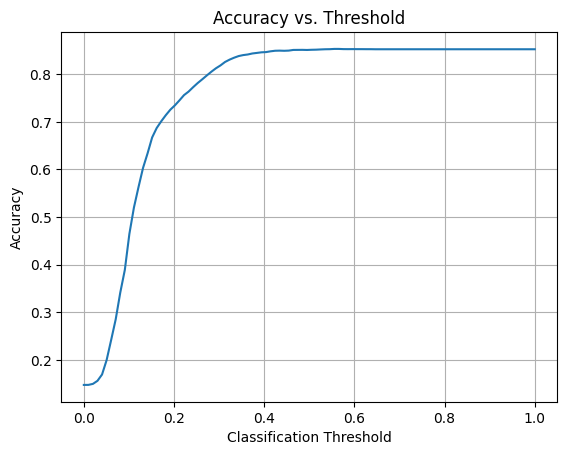

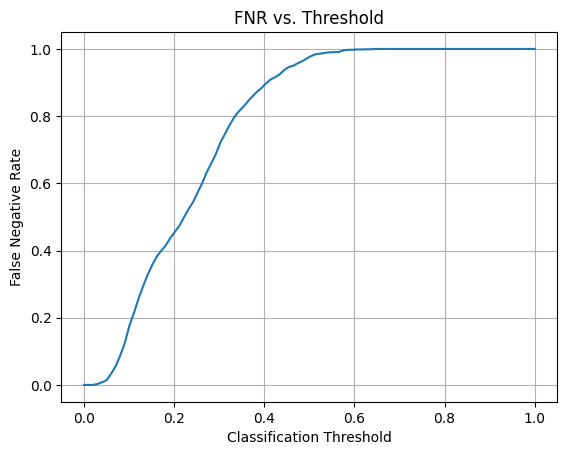

In [ ]:
# @title threshold analysis
# @title threshold analysis
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, f1_score, roc_auc_score

device = model.device
n_features = X.shape[1]

# Save model info
save_dict = {
    'backbone_state_dict': model.backbone.state_dict(),
    'torch_head_state_dict': model.torch_head.state_dict(),
    'best_params': {
        'hidden_dims': (128, 64),
        'dropout_rate': 0.2,
        'lr': 0.001,
        'batch_size': 64,
        'epochs': 30,
        'l1_lambda': 0.0001,
        'l2_lambda': 0.0,
        'early_stopping_patience': 10
    },
    'input_dim': n_features,
    'test_accuracy': accuracy_score(y_test, preds_class),
    'test_auc': roc_auc_score(y_test, preds_proba),
    'test_f1': f1_score(y_test, preds_class)
}

# Compute probabilities directly
model.backbone.eval()
model.torch_head.eval()
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test.values if hasattr(X_test, "values") else X_test).to(device)
    logits = model.torch_head(model.backbone(X_test_tensor))
    prob = torch.sigmoid(logits).cpu().numpy().flatten()
    y = y_test.values if hasattr(y_test, "values") else y_test

# ROC curve
fpr, tpr, thresholds_roc = roc_curve(y, prob)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Accuracy vs Threshold
thresholds = np.linspace(0, 1, 100)
accuracies = [accuracy_score(y, (prob >= t).astype(int)) for t in thresholds]

plt.plot(thresholds, accuracies)
plt.xlabel('Classification Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.show()

# FNR vs Threshold
fnr_list = []
for t in thresholds:
    preds = (prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y, preds).ravel()
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    fnr_list.append(fnr)

plt.plot(thresholds, fnr_list)
plt.xlabel('Classification Threshold')
plt.ylabel('False Negative Rate')
plt.title('FNR vs. Threshold')
plt.grid(True)
plt.show()

##### fails

In [ ]:
# Modular neural backbone + interchangeable heads (PyTorch + sklearn)
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_array
from typing import Optional, Callable

# ---------------------------
# Utilities to convert inputs
# ---------------------------
def to_torch(x):
    if isinstance(x, np.ndarray):
        return torch.from_numpy(x).float()
    else:
        return torch.from_numpy(x.values).float()

def ensure_numpy(x):
    if hasattr(x, "values"):
        return x.values
    return np.array(x)

# ---------------------------
# Backbone (feature extractor)
# ---------------------------
class MLPBackbone(nn.Module):
    def __init__(self, input_dim, hidden_dims=(128, 64), activation=nn.ReLU):
        super().__init__()
        dims = [input_dim] + list(hidden_dims)
        layers = []
        for i in range(len(dims)-1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(activation())
        # final feature vector (no activation)
        self.feature_net = nn.Sequential(*layers)

    def forward(self, x):
        return self.feature_net(x)

# ---------------------------
# PyTorch head (trainable)
# ---------------------------
class TorchHead(nn.Module):
    def __init__(self, feature_dim, out_dim=1):
        super().__init__()
        self.lin = nn.Linear(feature_dim, out_dim)

    def forward(self, features):
        return self.lin(features).squeeze(-1)

# ---------------------------
# Full model wrapper (for convenience)
# ---------------------------
class ModularRegressor:
    def __init__(self,
                 backbone: nn.Module,
                 torch_head: Optional[nn.Module] = None,
                 device: Optional[str] = None):
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.backbone = backbone.to(self.device)
        self.torch_head = torch_head.to(self.device) if torch_head is not None else None
        self.sklearn_head = None  # store sklearn model if used

    def _make_dataloader(self, X, y, batch_size=64, shuffle=True):
        X_t = to_torch(ensure_numpy(X)).to(self.device)
        y_t = to_torch(ensure_numpy(y)).to(self.device).squeeze()
        return DataLoader(TensorDataset(X_t, y_t), batch_size=batch_size, shuffle=shuffle)

    # ---------------------------
    # Train a PyTorch head end-to-end (or freeze backbone if desired)
    # ---------------------------
    def train_torch_head(self,
                         X_train, y_train,
                         X_val=None, y_val=None,
                         head: Optional[nn.Module] = None,
                         freeze_backbone: bool = False,
                         optimizer_cls=torch.optim.Adam,
                         lr=1e-3,
                         batch_size=64,
                         epochs=50,
                         loss_fn: Callable = nn.BCEWithLogitsLoss(),
                         l1_lambda: float = 0.0,
                         l2_lambda: float = 0.0,
                         verbose: bool = True):
        # set head
        if head is not None:
            self.torch_head = head.to(self.device)
        assert self.torch_head is not None, "Provide a torch head (TorchHead) to train."

        # freeze backbone if requested
        for p in self.backbone.parameters():
            p.requires_grad = not freeze_backbone

        # optimizer for parameters that require grad
        params = filter(lambda p: p.requires_grad, list(self.backbone.parameters()) + list(self.torch_head.parameters()))
        opt = optimizer_cls(params, lr=lr)

        train_loader = self._make_dataloader(X_train, y_train, batch_size=batch_size, shuffle=True)
        val_loader = None
        if X_val is not None and y_val is not None:
            val_loader = self._make_dataloader(X_val, y_val, batch_size=batch_size, shuffle=False)

        best_val = float('inf')
        for epoch in range(1, epochs+1):
            self.backbone.train()
            self.torch_head.train()
            epoch_losses = []
            for xb, yb in train_loader:
                opt.zero_grad()
                feats = self.backbone(xb)
                preds = self.torch_head(feats)

                loss = loss_fn(preds, yb)

                # L1 / L2 penalties on head weights to mimic Lasso/Ridge if desired
                if l1_lambda > 0:
                    l1_pen = 0.
                    for p in self.torch_head.parameters():
                        l1_pen = l1_pen + p.abs().sum()
                    loss = loss + l1_lambda * l1_pen

                if l2_lambda > 0:
                    l2_pen = 0.
                    for p in self.torch_head.parameters():
                        l2_pen = l2_pen + (p**2).sum()
                    loss = loss + l2_lambda * l2_pen

                loss.backward()
                opt.step()
                epoch_losses.append(loss.item())

            # optional validation
            if val_loader is not None:
                self.backbone.eval()
                self.torch_head.eval()
                val_preds = []
                val_trues = []
                with torch.no_grad():
                    for xb, yb in val_loader:
                        feats = self.backbone(xb)
                        preds = self.torch_head(feats)
                        val_preds.append(preds.cpu().numpy())
                        val_trues.append(yb.cpu().numpy())
                val_preds = np.concatenate(val_preds)
                val_trues = np.concatenate(val_trues)
                val_mse = mean_squared_error(val_trues, val_preds)
                if verbose and (epoch % max(1, epochs//10) == 0 or epoch==1 or epoch==epochs):
                    print(f"Epoch {epoch}/{epochs} - train_loss: {np.mean(epoch_losses):.6f} - val_mse: {val_mse:.6f}")
                if val_mse < best_val:
                    best_val = val_mse
            else:
                if verbose and (epoch % max(1, epochs//10) == 0 or epoch==1 or epoch==epochs):
                    print(f"Epoch {epoch}/{epochs} - train_loss: {np.mean(epoch_losses):.6f}")

        return self

    # ---------------------------
    # Train an sklearn head on extracted features
    # ---------------------------
    def train_sklearn_head(self, X_train, y_train, sklearn_model, freeze_backbone: bool = True, batch_size=512):
        # freeze backbone and extract features (run on CPU to give sklearn numpy arrays)
        self.backbone.eval()
        device_backup = self.device
        # move backbone to CPU temporarily if it's on GPU to extract numpy features
        self.backbone.to("cpu")
        X_np = ensure_numpy(X_train)
        X_np = check_array(X_np)  # sklearn utility to ensure shape
        # chunking to avoid memory issues
        feats = []
        with torch.no_grad():
            for i in range(0, X_np.shape[0], batch_size):
                xb = torch.from_numpy(X_np[i:i+batch_size]).float()
                feats.append(self.backbone(xb).numpy())
        feats = np.vstack(feats)
        # fit sklearn model
        sklearn_model.fit(feats, ensure_numpy(y_train).ravel())
        self.sklearn_head = sklearn_model
        # return backbone to original device
        self.backbone.to(device_backup)
        return self

    # ---------------------------
    # Predict function (auto-detect head type)
    # ---------------------------
    def predict(self, X):
        X_np = ensure_numpy(X)
        if self.sklearn_head is not None:
            # extract features (on CPU)
            self.backbone.eval()
            self.backbone.to("cpu")
            with torch.no_grad():
                feats = self.backbone(torch.from_numpy(X_np).float()).numpy()
            # predict with sklearn
            preds = self.sklearn_head.predict(feats)
            self.backbone.to(self.device)
            return preds
        elif self.torch_head is not None:
            self.backbone.eval()
            self.torch_head.eval()
            with torch.no_grad():
                xt = to_torch(X_np).to(self.device)
                preds = self.torch_head(self.backbone(xt)).cpu().numpy()
            return preds
        else:
            raise RuntimeError("No head trained. Train a torch head or sklearn head first.")

# ---------------------------
# Example usage (assuming X_train_scaled etc. exist)
# ---------------------------
if __name__ == "__main__":
    # Example inputs: replace these with your objects
    # X_train_scaled, X_test_scaled, y_train, y_test are assumed available (pandas/ndarray)
    import random
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # create backbone sized to your X
    input_dim = X_train_scaled.shape[1]  # uses your existing DataFrame
    backbone = MLPBackbone(input_dim=input_dim, hidden_dims=(128, 64))
    model = ModularRegressor(backbone, device=None)

    # 1) Train a PyTorch linear head end-to-end with MSE (you can swap loss to nn.L1Loss etc.)
    feature_dim = 64  # IMPORTANT: feature_dim must match final size of backbone layers
    # If backbone last hidden size is 64 (as above), feature_dim = 64. Adjust if you change hidden_dims.
    torch_head = TorchHead(feature_dim=64, out_dim=1)
    # train (end-to-end)
    model.train_torch_head(
        X_train=X_train_scaled, y_train=y_train,
        X_val=X_test_scaled, y_val=y_test,
        head=torch_head,
        freeze_backbone=False,  # True would only train head (useful when fitting sklearn head later)
        optimizer_cls=torch.optim.Adam,
        lr=1e-3,
        batch_size=128,
        epochs=50,
        loss_fn=nn.MSELoss(),
        l1_lambda=0.0,  # set >0.0 to introduce L1 penalty on head weights (Lasso-like)
        l2_lambda=0.0,  # set >0.0 to introduce L2 penalty on head weights (Ridge-like)
        verbose=True
    )

    preds = model.predict(X_test_scaled)
    print("PyTorch-head Test MSE:", mean_squared_error(ensure_numpy(y_test).ravel(), preds))

    # 2) Freeze backbone and train an sklearn head (Lasso/Ridge/RandomForest) on extracted features
    # Example: sklearn Lasso head
    sklearn_lasso = Lasso(alpha=1e-3, random_state=seed, max_iter=10000)
    model.train_sklearn_head(X_train_scaled, y_train, sklearn_model=sklearn_lasso)
    preds = model.predict(X_test_scaled)
    print("Sklearn Lasso-head Test MSE:", mean_squared_error(ensure_numpy(y_test).ravel(), preds))

    # Example: RandomForest head
    rf = RandomForestRegressor(n_estimators=200, random_state=seed, n_jobs=-1)
    model.train_sklearn_head(X_train_scaled, y_train, sklearn_model=rf)
    preds = model.predict(X_test_scaled)
    print("RandomForest-head Test MSE:", mean_squared_error(ensure_numpy(y_test).ravel(), preds))


AssertionError: Size mismatch between tensors

In [ ]:
# @title avg crossval MSE
my_str = "Epoch 1/50 - train_loss: 0.117921 - val_mse: 0.118287 Epoch 5/50 - train_loss: 0.114971 - val_mse: 0.118041 Epoch 10/50 - train_loss: 0.114031 - val_mse: 0.117544 Epoch 15/50 - train_loss: 0.112754 - val_mse: 0.118169 Epoch 20/50 - train_loss: 0.111515 - val_mse: 0.120077 Epoch 25/50 - train_loss: 0.110065 - val_mse: 0.120107 Epoch 30/50 - train_loss: 0.108409 - val_mse: 0.121406 Epoch 35/50 - train_loss: 0.106747 - val_mse: 0.121959 Epoch 40/50 - train_loss: 0.104935 - val_mse: 0.124718 Epoch 45/50 - train_loss: 0.103715 - val_mse: 0.125197 Epoch 50/50 - train_loss: 0.102297 - val_mse: 0.125837"

import re

my_str = "Epoch 1/50 - train_loss: 0.117921 - val_mse: 0.118287 Epoch 5/50 - train_loss: 0.114971 - val_mse: 0.118041 Epoch 10/50 - train_loss: 0.114031 - val_mse: 0.117544 Epoch 15/50 - train_loss: 0.112754 - val_mse: 0.118169 Epoch 20/50 - train_loss: 0.111515 - val_mse: 0.120077 Epoch 25/50 - train_loss: 0.110065 - val_mse: 0.120107 Epoch 30/50 - train_loss: 0.108409 - val_mse: 0.121406 Epoch 35/50 - train_loss: 0.106747 - val_mse: 0.121959 Epoch 40/50 - train_loss: 0.104935 - val_mse: 0.124718 Epoch 45/50 - train_loss: 0.103715 - val_mse: 0.125197 Epoch 50/50 - train_loss: 0.102297 - val_mse: 0.125837"

# Extract all val_mse values
val_mse_values = re.findall(r'val_mse: ([\d.]+)', my_str)
val_mse_values = [float(val) for val in val_mse_values]

# Calculate average
average_val_mse = sum(val_mse_values) / len(val_mse_values)

print(f"Val MSE values: {val_mse_values}")
print(f"Average val_mse: {average_val_mse:.6f}")

Val MSE values: [0.118287, 0.118041, 0.117544, 0.118169, 0.120077, 0.120107, 0.121406, 0.121959, 0.124718, 0.125197, 0.125837]
Average val_mse: 0.121031


Epoch 1/30 - train_loss: 0.403011 - val_mse: 0.117695
Epoch 3/30 - train_loss: 0.374976 - val_mse: 0.117739
Epoch 6/30 - train_loss: 0.368170 - val_mse: 0.118820
Epoch 9/30 - train_loss: 0.362958 - val_mse: 0.119815
Epoch 12/30 - train_loss: 0.358333 - val_mse: 0.120444
Epoch 15/30 - train_loss: 0.354968 - val_mse: 0.122237
Epoch 18/30 - train_loss: 0.351065 - val_mse: 0.121682
Epoch 21/30 - train_loss: 0.348086 - val_mse: 0.123507
Epoch 24/30 - train_loss: 0.344996 - val_mse: 0.123198
Epoch 27/30 - train_loss: 0.342002 - val_mse: 0.125807
Epoch 30/30 - train_loss: 0.339432 - val_mse: 0.125941
AUC: 0.5785, F1: 0.2639


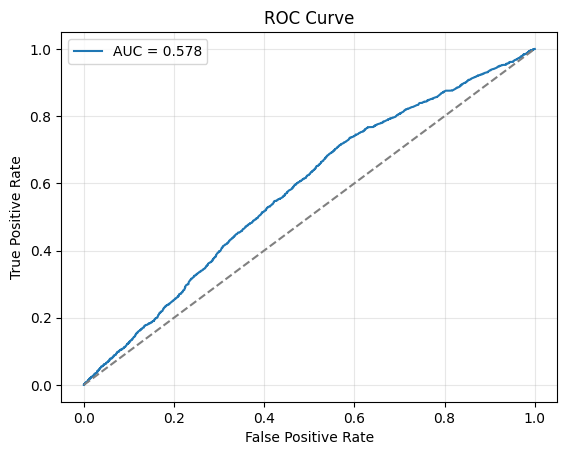

In [ ]:
# @title ROC curve
import torch
import torch.nn as nn
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# classification head
class TorchClassifierHead(nn.Module):
    def __init__(self, feature_dim):
        super().__init__()
        self.lin = nn.Linear(feature_dim, 1)

    def forward(self, feats):
        return torch.sigmoid(self.lin(feats)).squeeze(-1)

# example: train classification head with BCE loss
model.train_torch_head(
    X_train=X_train_scaled, y_train=y_train,
    X_val=X_test_scaled, y_val=y_test,
    head=TorchClassifierHead(feature_dim=64),
    freeze_backbone=False,
    lr=1e-3, epochs=30,
    loss_fn=nn.BCELoss(),  # BCE instead of MSE
    verbose=True
)

# predictions and metrics
probs = model.predict(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)
preds = (probs > 0.5).astype(int)
f1 = f1_score(y_test, preds)

print(f"AUC: {auc_score:.4f}, F1: {f1:.4f}")

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-1345044678.py, line 567)

# Fairness of Inclusion of Demographics

In [ ]:
# rename male_x to male
X = X.rename(columns={'white_x': 'white', 'male_x': 'male'})
# X = X.merge(dfc[['black', 'white', 'male']], left_index=False, right_index=True)

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

groups = ['black', 'white']  # or whatever race categories you use
# add groups back in by merging dfc by index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''filter = ['violent', 'remand_requested', 'ror_requested', 'nmr_requested',
       'no_release_requested', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'pending_vfo', 'pending_nonvfo', 'pending_misd',
       'requests_missing', 'pend_priors_missing', 'charge_score', 'intercept']'''

for group in groups:
    mask = X_test[group] == 1
    # prob_pos = model.predict_proba(X_test[mask][filter])[:, 1]
    prob_pos = model.predict_proba(X_test[mask])[:, 1]
    true_labels = y_test[mask]

    prob_true, prob_pred = calibration_curve(true_labels, prob_pos, n_bins=10)
    plt.plot(prob_pred, prob_true, label=group)

plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot by race')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import brier_score_loss

for group in groups:
    mask = X_test[group] == 1
    # prob_pos = model.predict_proba(X_test[mask][filter])[:, 1]
    prob_pos = model.predict_proba(X_test[mask])[:, 1]
    score = brier_score_loss(y_test[mask], prob_pos)
    print(f'{group} Brier score:', round(score, 3))

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

groups = ['male']  # or whatever race categories you use

for group in [1, 0]:    # 1 (male), 0 (female)
    mask = X_test['male'] == group
    # prob_pos = model.predict_proba(X_test[mask][filter])[:, 1]
    prob_pos = model.predict_proba(X_test[mask])[:, 1]
    true_labels = y_test[mask]

    prob_true, prob_pred = calibration_curve(true_labels, prob_pos, n_bins=10)
    plt.plot(prob_pred, prob_true, label=group)

plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot by gender')
plt.legend(['male', 'female'])
plt.show()

In [ ]:
from sklearn.metrics import brier_score_loss

mask = X_test['male'] == 1
prob_pos = model.predict_proba(X_test[mask][filter])[:, 1]
score = brier_score_loss(y_test[mask], prob_pos)
print(f'male Brier score:', round(score, 3))

mask = X_test['male'] == 0
prob_pos = model.predict_proba(X_test[mask][filter])[:, 1]
score = brier_score_loss(y_test[mask], prob_pos)
print(f'female Brier score:', round(score, 3))

# Exclusion Time~!!

In [ ]:
X = X[['violent', 'remand_requested',
       'ror_requested', 'nmr_requested', 'no_release_requested',
       'prior_vfo_cnt', 'prior_nonvfo_cnt', 'prior_misd_cnt', 'pending_vfo',
       'pending_nonvfo', 'pending_misd', 'requests_missing',
       'pend_priors_missing', 'charge_score', 'intercept']]

In [ ]:
# print the fpr and fnr of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty="l2", C=1e-4, solver='saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# visualize tn, fp, fn, tp
fig, ax = plt.subplots()
ax.bar(['True Negative', 'False Positive', 'False Negative', 'True Positive'], [tn, fp, fn, tp])
ax.set_xlabel('Confusion Matrix')
ax.set_ylabel('Count')

model.predict_proba(X_test)

In [ ]:
# Get predicted probabilities
probs = pd.Series(model.predict_proba(X_test)[:, 1])

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(probs, bins=np.arange(0, 1.05, 0.05), kde=False, color='royalblue', edgecolor='black')

plt.xlabel('Predicted Rearrest Probability', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Predicted Rearrest Probability', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# accuracy of model?
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

# Subgroup analysis

In [ ]:
df_rmis = dfc[dfc['requests_missing'] == 1]
dr_pmis = dfc[dfc['pend_priors_missing'] == 1]

In [ ]:
# plot demographic codes for these, male (0,1), black(0,1), age (cont), nyc (0,1)
fig, axes = plt.subplots(1, 4, figsize=(14, 4))
cols = ['male', 'black', 'age', 'nyc']

for i, col in enumerate(cols):
    ax = axes[i]
    if df_rmis[col].nunique() == 2:  # binary vars
        sns.histplot(df_rmis[col], stat='probability', discrete=True, ax=ax, color='blue', alpha=0.5, label='requests missing')
        sns.histplot(dr_pmis[col], stat='probability', discrete=True, ax=ax, color='orange', alpha=0.5, label='pend & priors missing')
        ax.set_xticks([0, 1])
    else:  # continuous var like age
        sns.kdeplot(df_rmis[col], ax=ax, color='blue', fill=True, alpha=0.4, label='requests missing')
        sns.kdeplot(dr_pmis[col], ax=ax, color='orange', fill=True, alpha=0.4, label='pend & priors missing')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Split groups
nyc = dfc[dfc['nyc'] == 1]
non_nyc = dfc[dfc['nyc'] == 0]

# Summarize demographics
summary = pd.DataFrame({
    'NYC_Mean': [
        nyc['male'].mean(),
        nyc['black'].mean(),
        nyc['age'].mean(),
        nyc['requests_missing'].mean(),
        nyc['pend_priors_missing'].mean()
    ],
    'NonNYC_Mean': [
        non_nyc['male'].mean(),
        non_nyc['black'].mean(),
        non_nyc['age'].mean(),
        non_nyc['requests_missing'].mean(),
        non_nyc['pend_priors_missing'].mean()
    ]
}, index=['male', 'black', 'age', 'requests_missing', 'pend_priors_missing'])

# Add difference and sample sizes
summary['Difference (NYC - NonNYC)'] = summary['NYC_Mean'] - summary['NonNYC_Mean']
summary['NYC_n'] = len(nyc)
summary['NonNYC_n'] = len(non_nyc)

print(summary.round(3))

cols = ['male', 'black', 'age', 'requests_missing', 'pend_priors_missing']

fig, axes = plt.subplots(1, len(cols), figsize=(16, 4))

for i, col in enumerate(cols):
    ax = axes[i]
    if dfc[col].nunique() == 2:  # binary
        sns.histplot(nyc[col], stat='probability', discrete=True, ax=ax,
                     color='royalblue', alpha=0.5, label='NYC')
        sns.histplot(non_nyc[col], stat='probability', discrete=True, ax=ax,
                     color='navajowhite', alpha=0.5, label='Non-NYC')
        ax.set_xticks([0, 1])
    else:  # continuous (e.g. age)
        sns.kdeplot(nyc[col], ax=ax, color='royalblue', fill=True, alpha=0.4, label='NYC')
        sns.kdeplot(non_nyc[col], ax=ax, color='navajowhite', fill=True, alpha=0.4, label='Non-NYC')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

                     NYC_Mean  NonNYC_Mean  Difference (NYC - NonNYC)  NYC_n  \
male                    0.827        0.769                      0.058  75508   
black                   0.566        0.331                      0.235  75508   
age                    -0.010        0.017                     -0.027  75508   
requests_missing        0.307        0.286                      0.022  75508   
pend_priors_missing     0.011        0.066                     -0.055  75508   

                     NonNYC_n  
male                    46269  
black                   46269  
age                     46269  
requests_missing        46269  
pend_priors_missing     46269  


In [ ]:
# % of nyc within dfc
df_released = dfc[dfc['release'] == 1]
len(df_released[df_released['nyc'] == 1]) / len(df_released)

0.6334740112019329

# Other

In [ ]:
vars.remove('release')

In [ ]:
# Create a heatmap of correlation
import seaborn as sns

data = dfc[vars]
# Dummy encode judge_name, charge, charge_severity, charge_weight
data = pd.get_dummies(data, columns=['charge', 'charge_severity', 'charge_weight'])

# Calculate correlation
corr = data.corr()

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False)
plt.autoscale(True)
plt.show()

In [ ]:
corr[['release']].drop('release').sort_values(by='release', ascending=False)

In [ ]:
data[['release', 'rearrest']].value_counts().unstack()

True positives: care about when someone does reoffend
True negatives: care about innocennce
FPR / FNR: care about incorrect guesses. (i'm okay with some error as long as there are few incorrect keeping-people-in cases)

Tradeoff:
- every variable will help you predict things...
- if you exclude variables, you'll reduce accuracy
- even if you don't include them, you might be including correlates with the excluded vars

- how do you evaluate accuracy? bootstrap :D

- run ridge, do some shrinkage
- describe how you clean the data
- fairness: pick a method that you find meaningful
- why do you find it meaningful
- why is the OG model not fair
- how do you improve that fairness
- implement fairer method
- report new accuracy & compare with the original model, justify the lower accuracy tradeoff

In [ ]:
# correlation heatmap (massive graph)
# if there's anything crazy you'll see it here
import seaborn as sns

## Data prep

In [ ]:
### Create a cleaned dataset
# keep only people with release==1 and non-missing value of rearrest
dfc = df[(df['release'] == 1) & (df['rearrest'].notna())]  # dfc refers to "cleaned" data frame

## Make new indicators
# Add indicator for charge_severity = "Felony"
dfc['felony_charge'] = (dfc['charge_severity'] == 'Felony').astype(int)

## Define features
X = ['age','male','black','white','nyc','violent','felony_charge','remand_requested','ror_requested','nmr_requested','no_release_requested','prior_vfo_cnt','prior_nonvfo_cnt','prior_misd_cnt','pending_vfo','pending_nonvfo','pending_misd']

## Impute missing values of x
# Create the imputer: strategy = 'most_frequent' uses the mode
imputer = SimpleImputer(strategy='most_frequent')
# Do imputation by overwriting the X variables in dfc
dfc[X] = imputer.fit_transform(dfc[X])


In [ ]:
## Preview first 5 rows of data
dfc.head()

In [ ]:
## Present summary stats on the feature_cols variables in df_clean
dfc[X].describe()

## Predict rearrest

In [ ]:
## OLS prediction of rearrest
# OLS regression of rearrest on X
# Import statsmodels package for regressions
import statsmodels.formula.api as smf

# Run regression and print output
# Use OLS with robust standard errors (HC1). "join" restates the variable list with +, as needed for the regression call.
reg = smf.ols('rearrest ~ ' + ' + '.join(X), data=dfc).fit(cov_type='HC1')
print(reg.summary())

dfc['S_hat'] = reg.fittedvalues  # Predicted values

In [ ]:
## Plot distribution of predictions
plt.hist(dfc['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability')
plt.show()

In [ ]:
## Plot distribution of predictions for men
plt.hist(dfc[dfc['male'] == 1]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Men')
plt.show()

## Plot distribution of predictions for women
plt.hist(dfc[dfc['male'] == 0]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Women')
plt.show()

## Evaluating alternative definitions of fairness

### "Efficient" classifier: uniform threshold

In [ ]:
## Assume a threshold of S_hat > 0.2 is optimal for detention
  # (on the basis of assumptions about j and c parameters)

# Print overall detention rate
EfficientRate = round((dfc['S_hat'] > 0.2).mean(),3)
print(f"Under this assumption, it is efficient to detain share {EfficientRate} of people.")

## Are detention rates equal?
# Print detention rates by gender if use a 0.2 threshold for detaining
print(round((dfc[dfc['male'] == 1]['S_hat'] > 0.2).mean(),3))
print(round((dfc[dfc['male'] == 0]['S_hat'] > 0.2).mean(),3))

With the selected threshold, we're labeling men as higher risk

### Fairness through unawareness

In [ ]:
## Get predictions from a regression without the male variable
X_nomale = [x for x in X if x != 'male']
reg = smf.ols('rearrest ~ ' + ' + '.join(X_nomale), data=dfc).fit(cov_type='HC1')
print(reg.summary())
dfc['S_hat_nomale'] = reg.fittedvalues  # Predicted values

## Ask whether average predictions are equal by group
# We don't have men as a predictor– but still our preditors are different across groups...
print(dfc.groupby('male')['S_hat_nomale'].mean())

## Regress male on other X variables
reg = smf.ols('male ~ ' + ' + '.join(X_nomale), data=dfc).fit(cov_type='HC1')
print(reg.summary())

Other things in the dataset are telling the model that who we have here is a guy...

Just removing protected information doesn't fully exclude the information...

### Statistical parity

In [ ]:
## Imagine we want to detain an equal share of men and women
  # Share EfficientRate of each

## Determine the S threshold used for each group
# Male
s_HR_male = dfc[dfc['male'] == 1]['S_hat'].quantile(1-EfficientRate)
print(s_HR_male)

# Female
s_HR_female = dfc[dfc['male'] == 0]['S_hat'].quantile(1-EfficientRate)
print(s_HR_female)

## Display on S_hat histograms
# Male
plt.hist(dfc[dfc['male'] == 1]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.axvline(x=s_HR_male, color='r', linestyle='--')
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Men')
plt.show()

# Female
plt.hist(dfc[dfc['male'] == 0]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.axvline(x=s_HR_female, color='r', linestyle='--')
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Women')
plt.show()

In [ ]:
import google, json, nbformat


# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                     timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
 ipynb_file.write(json.dumps(raw_notebook))


# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb


# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")


# Judges

In [ ]:
!apt-get update -qq
!apt install -y chromium-chromedriver -qq
!pip install selenium bs4 pandas -q

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(options=options)
url = "https://judges.scrutinize.org/all-judges"
driver.get(url)

# wait until judge entries load (10–20 seconds, depending on connection)
WebDriverWait(driver, 20).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "judge-entry"))
)

soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()

judges = soup.find_all("div", class_="judge-entry")
names = [j["data-judge-id"] for j in judges if j.has_attr("data-judge-id")]

def format_name(judge_id):
    parts = judge_id.split('-')
    if len(parts) == 2:
        first, last = parts
        return f"{last.title()}, {first.title()}"
    elif len(parts) > 2:
        first = parts[0].title()
        middle = " ".join(p.upper() + "." if len(p) == 1 else p.title() for p in parts[1:-1])
        last = parts[-1].title()
        return f"{last}, {first} {middle}".strip()
    return judge_id

formatted_names = [format_name(n) for n in names]
pd.DataFrame({"Name": formatted_names}).to_csv("supp-rev-judges.csv", index=False)

print(f"✅ Scraped {len(formatted_names)} judges.")


In [ ]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium

from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(options=chrome_options)
driver.get("https://judges.scrutinize.org/all-judges")

soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()

judges = soup.find_all("div", class_="judge-entry")
names = [j["data-judge-id"] for j in judges if j.has_attr("data-judge-id")]
print(len(names), "judges scraped")

pd.DataFrame({"name": names}).to_csv("judges.csv", index=False)


In [ ]:
!pip install requests_html --quiet
from requests_html import HTMLSession

session = HTMLSession()
r = session.get("https://judges.scrutinize.org/all-judges")
r.html.render(timeout=30)  # executes JS

judges = r.html.find("div.judge-entry")
names = [j.attrs["data-judge-id"] for j in judges]
print(len(names), "judges found")
names[:10]


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# URL
url = "https://judges.scrutinize.org/all-judges"

# Get page content
r = requests.get(url)
print(r)
soup = BeautifulSoup(r.text, "html.parser")

# Find all judge entries
judges = soup.find_all("div", class_="judge-entry")

# Extract and format names
def format_name(judge_id):
    parts = judge_id.split('-')
    if len(parts) == 2:
        first, last = parts
        return f"{last.title()}, {first.title()}"
    elif len(parts) > 2:
        # handle middle initials
        first = parts[0].title()
        middle = " ".join(p.upper() + "." if len(p) == 1 else p.title() for p in parts[1:-1])
        last = parts[-1].title()
        return f"{last}, {first} {middle}".strip()
    return judge_id

names = [format_name(tag['data-judge-id']) for tag in judges if tag.has_attr('data-judge-id')]

# Write to CSV
with open("judges.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Name"])
    for name in names:
        writer.writerow([name])

print(f"Saved {len(names)} judges to judges.csv")